## "Prediksi Nasabah Bank yang Berpotensi Membuka Deposito"

**Project Overview**
Bertujuan untuk menganalisis data dan pembelajaran mesin untuk memprediksi apakah seorang nasabah akan membuka deposito berjangka (term deposit) berdasarkan berbagai faktor seperti demografi, kebiasaan perbankan, dan kontak pemasaran sebelumnya.
Data yang diberikan mencakup berbagai atribut, termasuk data klien bank serta informasi terkait campaign pemasaran terakhir.

1. *Analisis Eksploratif Data (EDA):* Melakukan eksplorasi data untuk memahami karakteristik dasar dari dataset, distribusi variabel, dan pola hubungan antara variabel. Ini akan membantu dalam memahami data secara menyeluruh sebelum melangkah ke langkah-langkah analisis berikutnya.

2. *Segmentasi Nasabah:* Menggunakan teknik segmentasi untuk membagi nasabah menjadi kelompok berdasarkan atribut seperti usia, pekerjaan, status perkawinan, pendidikan, dan lainnya.

3. *Analisis Pola Nasabah:* Menganalisis pola nasabah di setiap segmen untuk mengidentifikasi tren yang mungkin mempengaruhi keputusan mereka untuk membuka deposito. Ini melibatkan analisis faktor-faktor seperti balance, dan sebagainya

4. *Pengembangan Treatment:* Berdasarkan analisis, mengembangkan treatment atau strategi pemasaran yang disesuaikan dengan masing-masing segmen nasabah untuk meningkatkan kemungkinan mereka membuka deposito. Ini mungkin melibatkan pendekatan seperti penargetan campaign pemasaran yang tepat atau penyesuaian layanan yang ditawarkan kepada nasabah.

5. *Evaluasi dan Optimalisasi:* Mengimplementasikan treatment pada kelompok nasabah tertentu dan memantau hasilnya. Melakukan evaluasi berkala untuk mengukur efektivitas treatment dan melakukan optimalisasi jika diperlukan.

*Hasilyang Diharapkan:*

1. Pemahaman yang lebih baik tentang pola nasabah dan faktor-faktor yang mempengaruhi keputusan mereka untuk membuka deposito.
   
2. Strategi campaign yang disesuaikan dengan karakteristik masing-masing segmen nasabah untuk meningkatkan tingkat keberhasilan dalam membuka deposito.

3. Peningkatan dalam tingkat konversi nasabah menjadi pembuka deposito, yang berpotensi meningkatkan pendapatan dan pertumbuhan bisnis bank.

Berdasarkan data set ini, diberikan data dengan beberapa variabel yang diberikan sebagai berikut:<br>

**Attributes Description**:<br>
A. bank client data:<br>
1. age: (numeric)<br>
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3. marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4. education: (categorical: primary, secondary, tertiary and unknown)<br>
5. default: has credit in default? (categorical: 'no','yes','unknown')<br>
6. housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7. loan: has personal loan? (categorical: 'no','yes','unknown')<br>
8. balance: Balance of the individual.<br>

B. Related with the last contact of the current campaign:
9. contact: contact communication type (categorical: 'cellular','telephone')<br>
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
11. day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
12. duration: last contact duration, in seconds (numeric).<br>
Important note:<br>
this attribute highly affects the output target (e.g., if duration=0 then y='no').<br>
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>

**Other attributes:**<br>
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14. pdays: number of days that passed by after the client was last contacted from a previous campaign <br>(numeric; 999 means client was not previously contacted)<br>
15. previous: number of contacts performed before this campaign and for this client (numeric)<br>
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: 'yes','no')

Analisa yang dapat dilakukan berdasarkan data set ini: <br>
- Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan deposit terbesar?<br>
- Apakah terdapat korelasi antara tingkat pendidikan dan balance? <br>
- Bagaimana korelasi dari pendidikan tersebut terhadap deposito?<br>
- Apakah terdapat perbedaan yang signifikan antara marital(status perkawinan nasabah) dengan kemungkinan nasabah untuk deposito?<br>
- Apakah semakin sering kontak dilakukan kepada nasabah selama masa campaign, semakin besar kemungkinan bahwa nasabah tersebut akan membuka deposito? (frekuensi  kontak)<br>
- Apakah lamanya waktu sejak kontak terakhir dengan nasabah mempengaruhi keputusan nasabah dalam membuka deposito? (waktu terakhir kontak)<br>



In [1]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 3.4 MB/s eta 0:00:00


In [2]:
#======Pandas Config========
import pandas as pd
pd.set_option("display.max_columns",None)

#=======Numpy=========
import numpy as np

#=======Visualization======
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#=======Preprocessing=======
# for Q-Q plots
import scipy.stats as stats
from feature_engine.outliers import Winsorizer
from scipy.stats import chi2_contingency

#=========Modeling ===========
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn import svm,tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split as tts
from sklearn import model_selection
#=====Warnings========
import warnings
warnings.filterwarnings("ignore")


#======Function========
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def create_stacked_bar_percent(df,column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['deposit'],columns = df[column_name], normalize = 'columns')
    default_by_group = default_by_group[default_by_group.iloc[1].sort_values().index]

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "deposit"
    list2_name = "Not Deposit"
    title = f" %Deposit by {column_name}"
    xlabel = column_name
    ylabel = "Number of Deposit"

    fig, ax = plt.subplots(figsize=(8,8),dpi=100)
    bar_width = 0.5

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold",fontsize=12)
    ax.set_xlabel(xlabel, fontweight = "bold",fontsize=12)
    ax.set_ylabel(ylabel, fontweight = "bold",fontsize=12)
    ax.legend(loc="upper right")

    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=12)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="black", fontsize=12, fontweight="bold")

    plt.show()

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

def missing_check(df):
  missing = df.isnull().sum()
  missing_per = round(missing/len(df),4)*100
  unique_val = df.nunique()
  type_data = df.dtypes
  df = pd.DataFrame({'Missing_values':missing,
                    'Percent of Missing (%)':missing_per,
                    'Numbers of Unique':unique_val,
                    'Data type':type_data})
  return df

# Load Dataset

In [3]:
df = pd.read_csv("/content/bank_deposit.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Data Inspection

In [4]:
#check 5 first row
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
#check duplicate
df.duplicated().sum()

0

there is no duplicate data

In [6]:
#check missing values,data type, dan numbers of unique value
missing_check(df)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
age,0,0.0,76,int64
job,0,0.0,12,object
marital,0,0.0,3,object
education,0,0.0,4,object
default,0,0.0,2,object
balance,0,0.0,3805,int64
housing,0,0.0,2,object
loan,0,0.0,2,object
contact,0,0.0,3,object
day,0,0.0,31,int64


tidak terdapat data yang missing, selanjutnya akan dilakukan analisis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
# Fungsi untuk mengelompokkan balance ke dalam kategori
def categorize_balance(balance):
    if balance < 0:
        return 'less than 0'
    elif balance <= 40000:
        return '0-40000'
    else:
        return 'more than 40000'

 # Membuat kategori balance dalam bentuk dictionary
balance_categories = {
    '<0': 'less than 0',
    '0-40000': '0-40000',
    '40001+': 'more than 40000'}


# Menerapkan fungsi ke kolom 'balance' dan membuat kolom baru 'balance_category'
df['balance_category'] = df['balance'].apply(categorize_balance)

# Menampilkan 5 baris pertama dari dataset dengan kategori balance baru
print(df[['balance', 'balance_category']].head())

   balance balance_category
0     2343          0-40000
1       45          0-40000
2     1270          0-40000
3     2476          0-40000
4      184          0-40000


In [9]:
for x in df.columns:
  print(f"=========={x}===============")
  print(f"{df[x].unique()}")
  print()

==========age===============
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]

==========job===============
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

==========marital===============
['married' 'single' 'divorced']

==========education===============
['secondary' 'tertiary' 'primary' 'unknown']

==========default===============
['no' 'yes']

==========balance===============
[2343   45 1270 ... 1594 2593 -134]

==========housing===============
['yes' 'no']

==========loan===============
['no' 'yes']

==========contact===============
['unknown' 'cellular' 'telephone']

==========day===============
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]

=======

Setelah menginvestigasi nilai-nilai pada setiap kolom, terdapat temuan menarik pada kolom pendidikan, di mana beberapa tingkat pendidikan tidak teridentifikasi (unknown), serta pada kolom "poutcome" yang memiliki nilai "unknown".

# Eksplonatory Data Analysis

In [10]:
#label encoding
df["deposit"] = df["deposit"].replace(['yes', 'no'],[0,1])
df["deposit"].unique()

array([0, 1])

In [11]:
#spliiting data 80% training and 20% test
X = df.drop('deposit',axis=1).copy()
y = df["deposit"].copy()

X_train,X_test,y_train,y_test = tts(X,y,stratify=y,test_size=0.2,random_state=42)

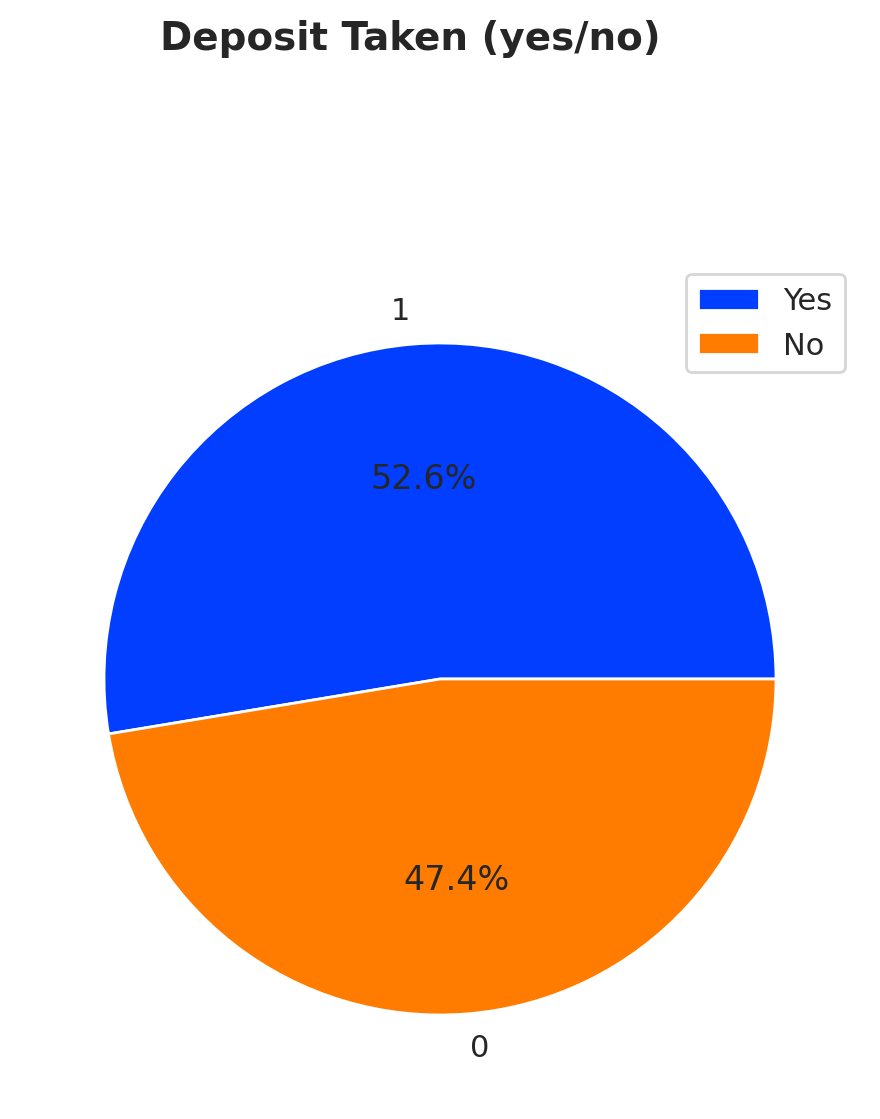

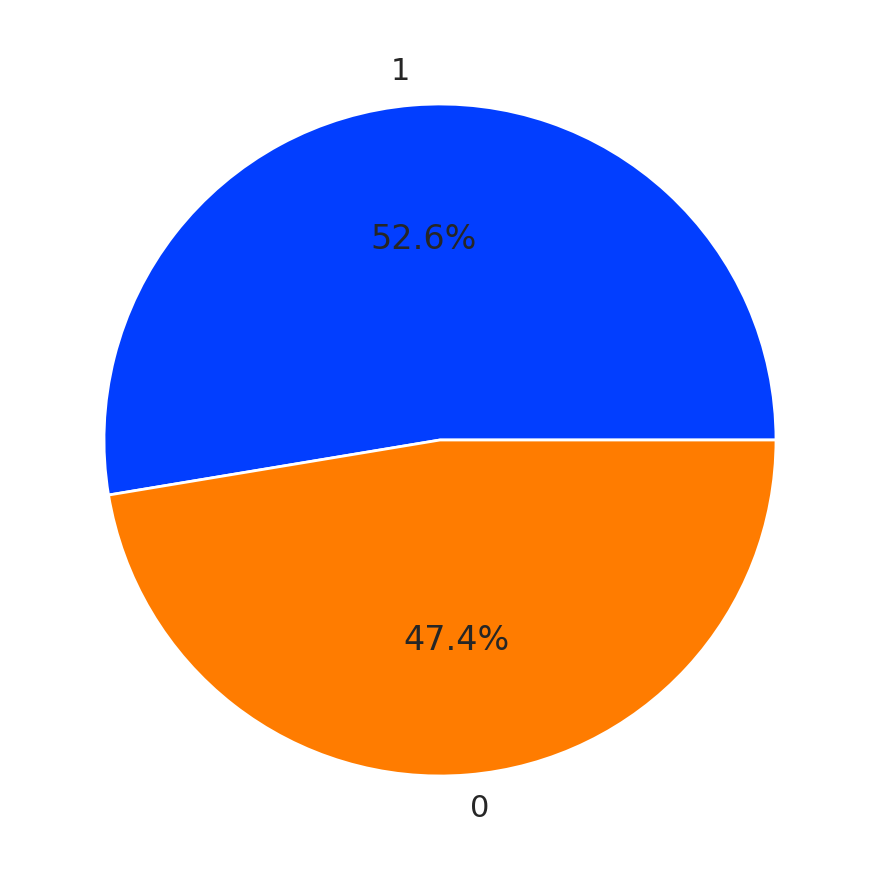

In [12]:
#baseline data
train_count = pd.Series(y_train).value_counts()
test_count = pd.Series(y_test).value_counts()


plt.figure(figsize=(12,12))
plt.subplot(211)
plt.suptitle('Deposit Taken (yes/no)',fontsize=14,fontweight="bold")
plt.pie(train_count,labels=train_count.index,autopct='%1.1f%%')
plt.legend(labels=['Yes','No'])
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(212)
plt.pie(test_count,labels=test_count.index,autopct='%1.1f%%')
plt.show()

 Kita bisa menginterpretasikan bahwa data tersebut cenderung cukup seimbang. Perbedaan 5.2% antara kedua kategori tidak terlalu besar sehingga tidak ada kategori yang secara signifikan mendominasi yang lain.

In [13]:
X_train.shape

(8929, 17)

In [14]:
X_train["deposit"] = y_train

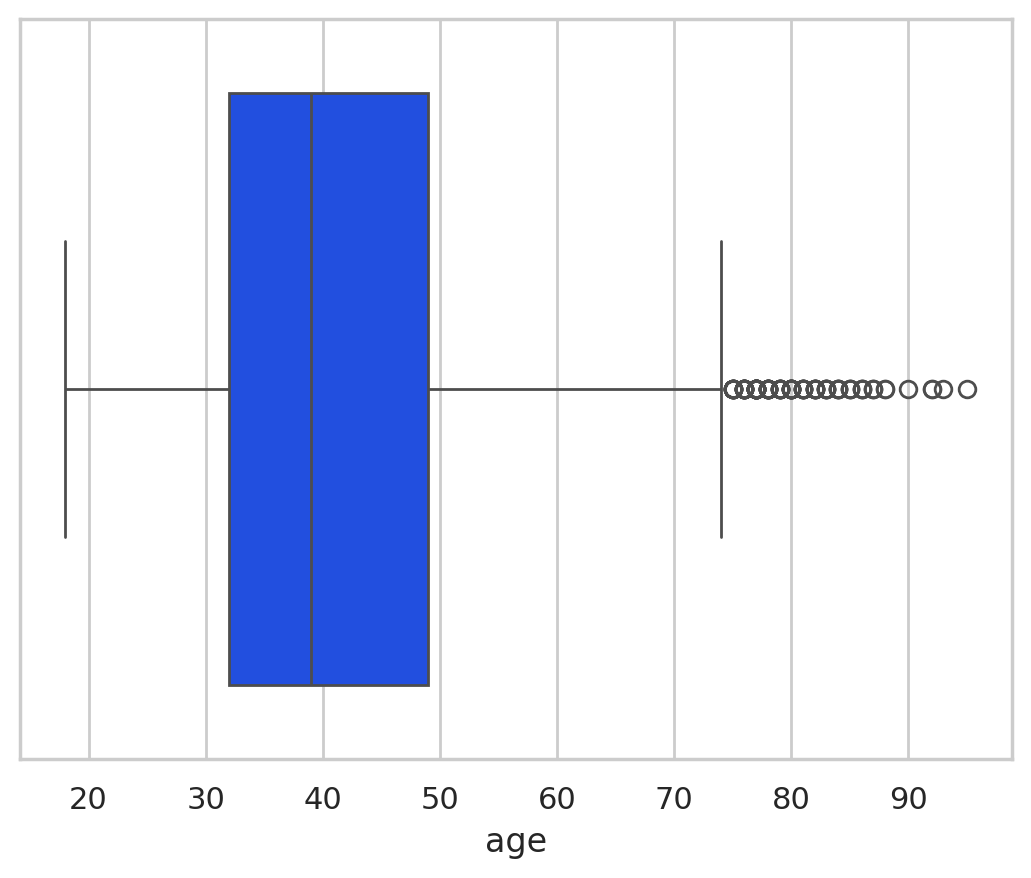

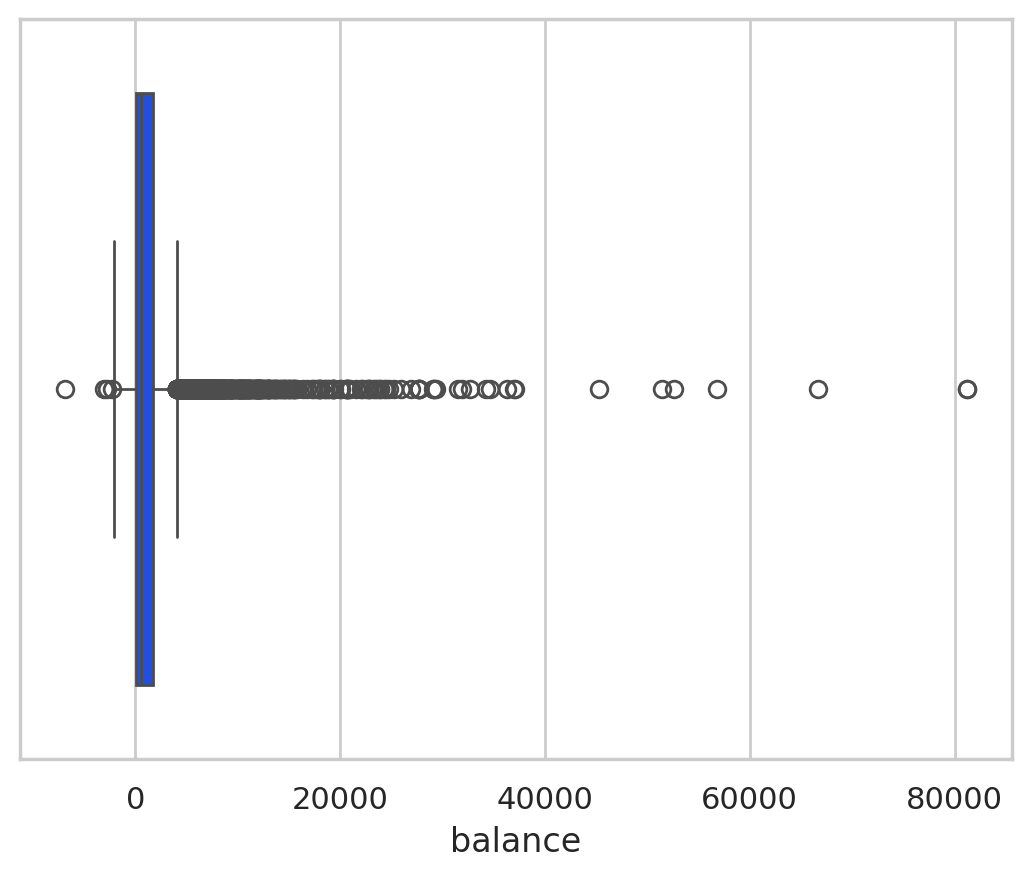

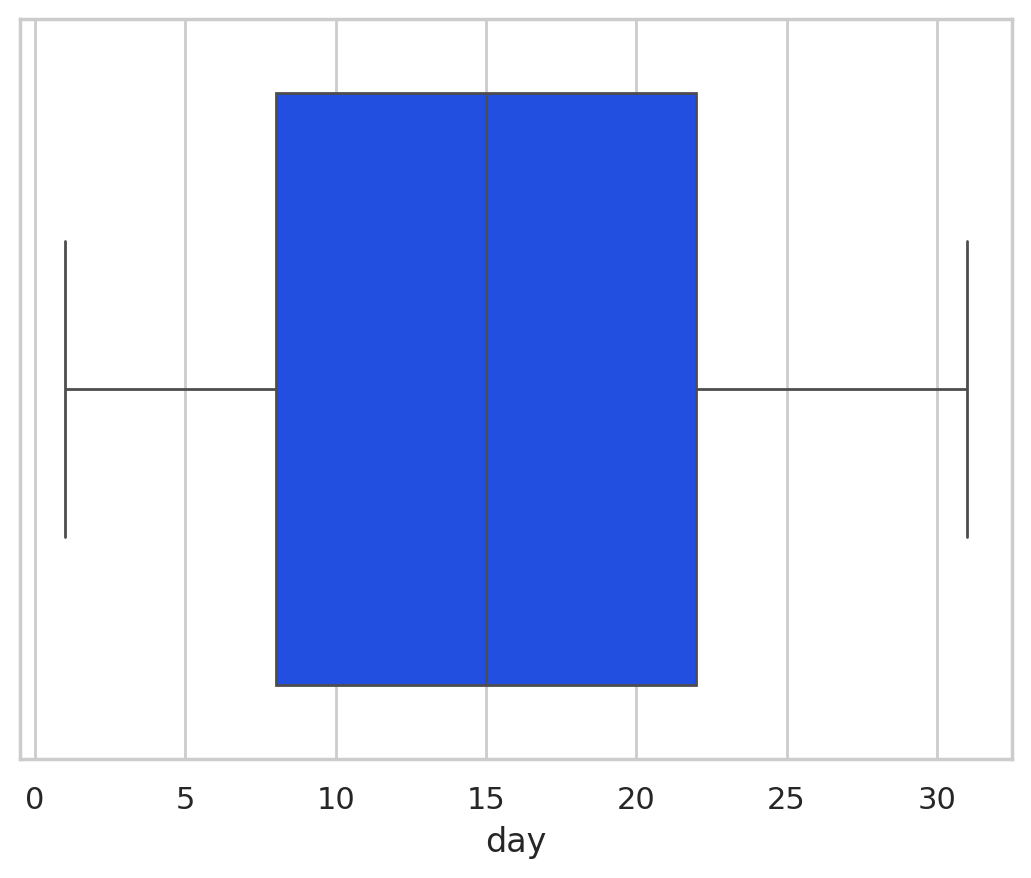

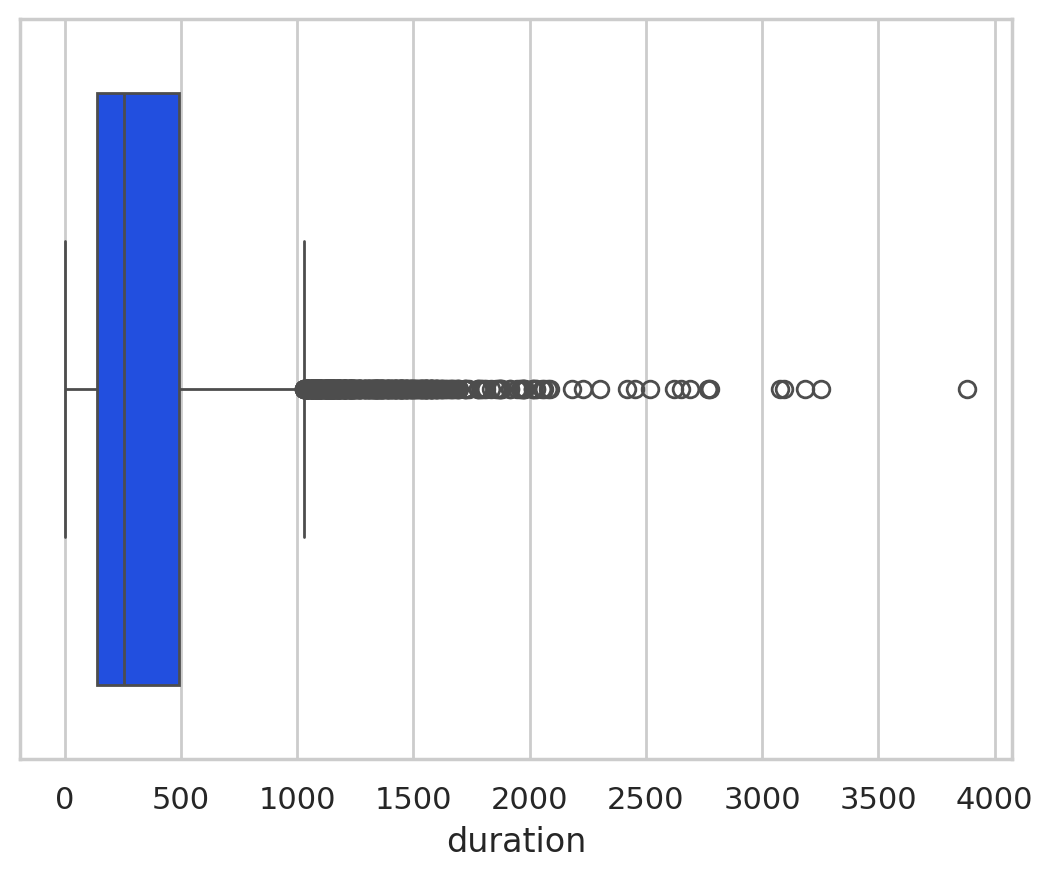

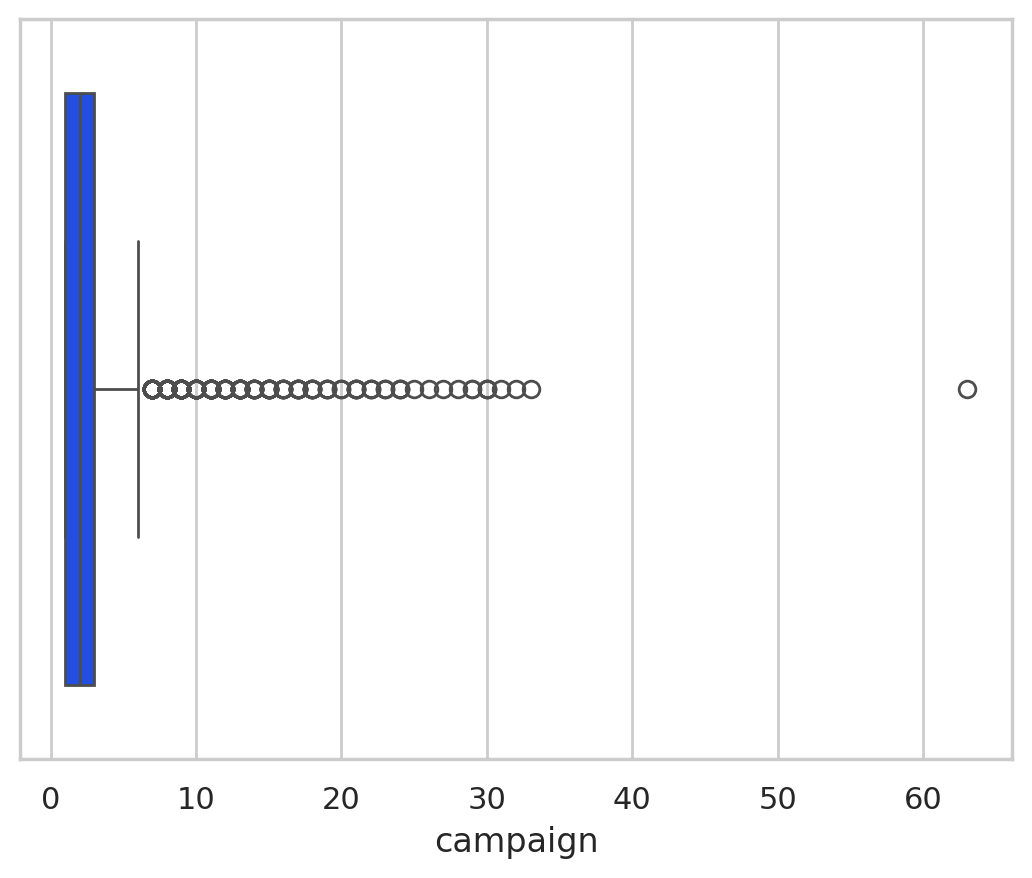

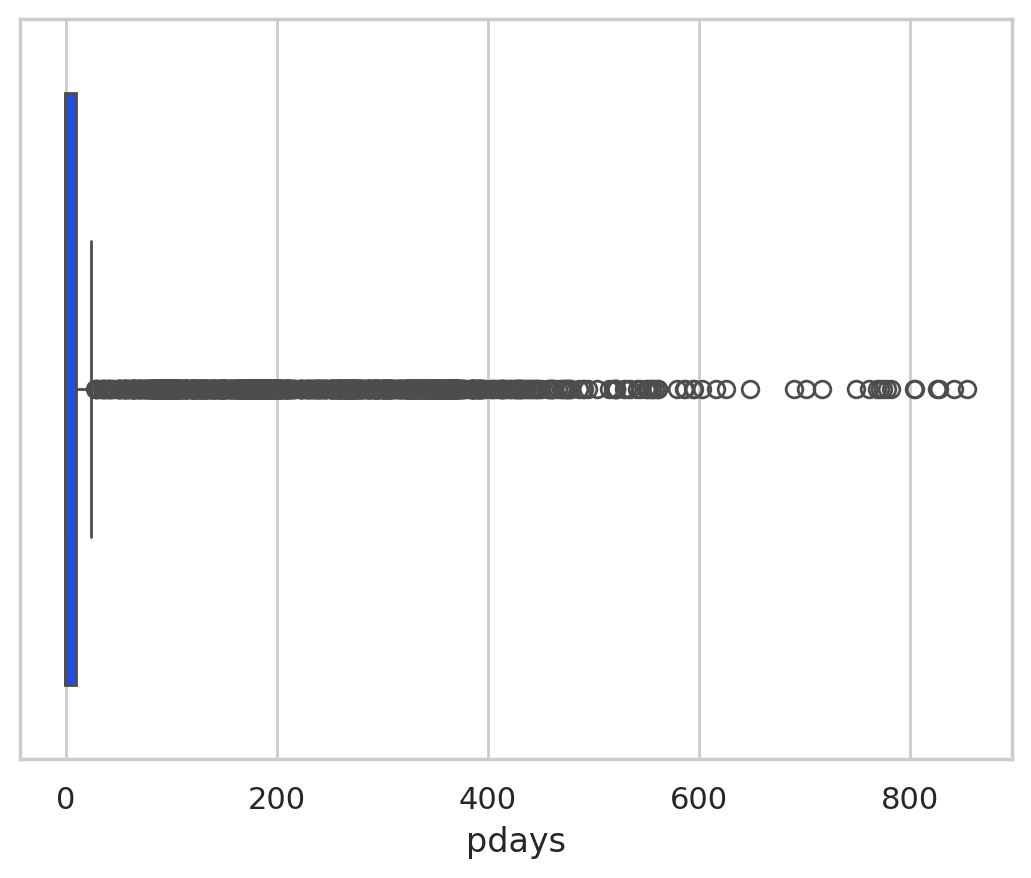

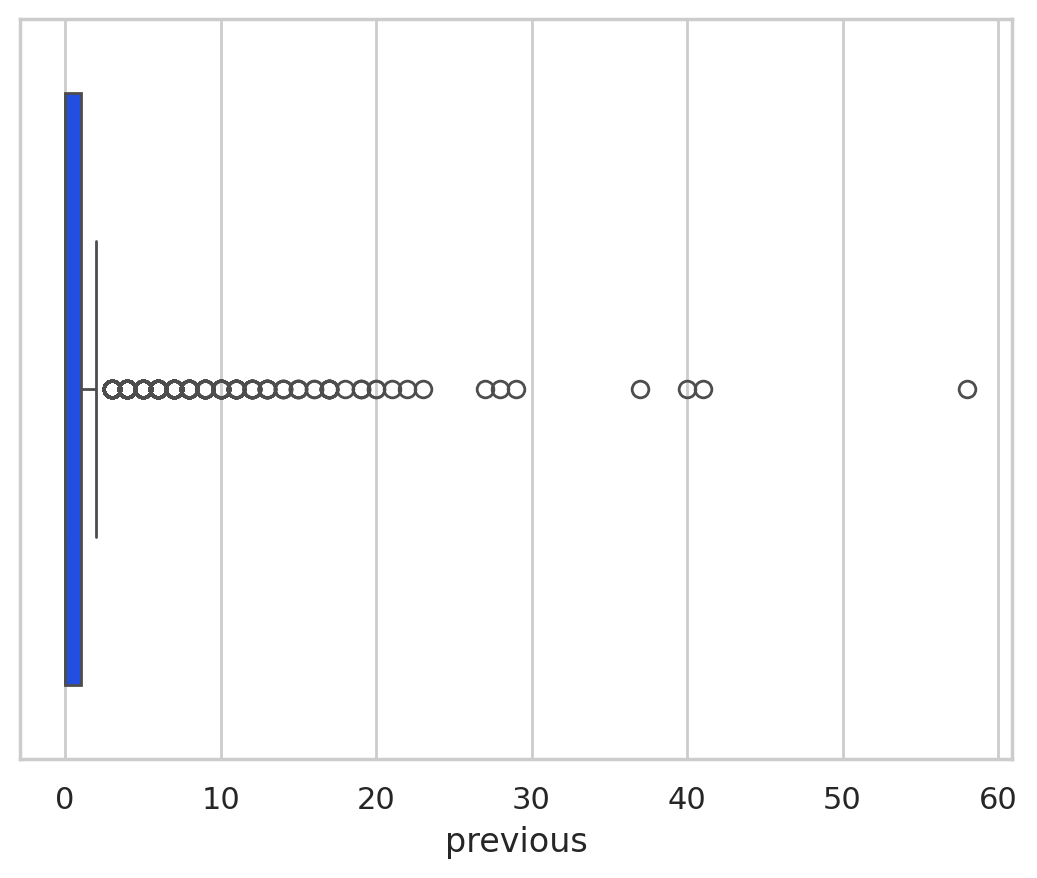

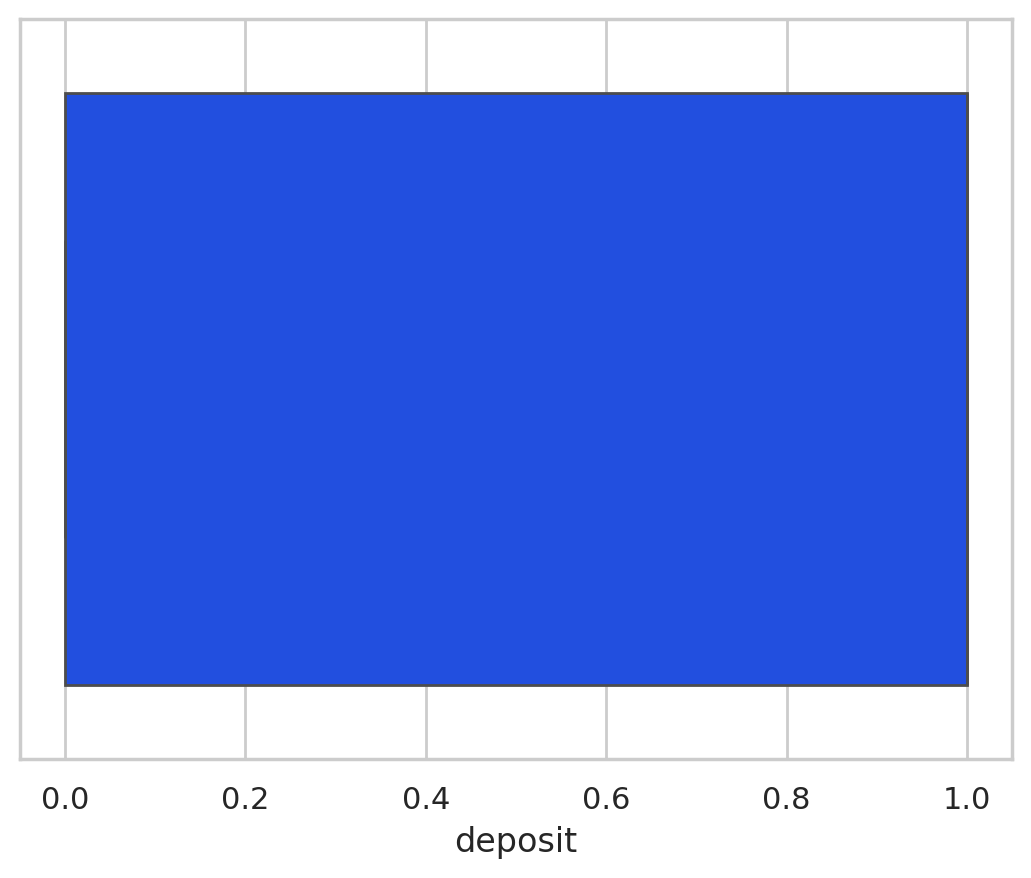

In [15]:
#check outliers
num = df.select_dtypes(exclude="object").columns


for x in num:
  plt.figure()
  sns.boxplot(data=X_train,x=X_train[x])

Observasi : <br>
1. kolom yang memiliki outliers adalah age, balance, duration, campaign, pdays, previous <br>
2. kolom age memiliki outliers karena usia nasabah maksimal nya adalah 95 tahun sehingga outliers disini adalah hal yang wajar<br>
3. kolom balance memiliki outliers, kolom balance adalah kolom yang  mengacu pada saldo atau jumlah uang yang dimiliki oleh nasabah di rekening bank mereka. Ini adalah informasi tentang jumlah uang yang tersedia dalam rekening bank klien pada saat tertentu. Sehingga outliers disini adalah hal yang wajar
4. duration memiliki outliers, kolom duration mengacu pada durasi kontak terakhir antara bank dan nasabah selama campaign pemasaran. Durasi ini diukur dalam detik. Sehingga outliers disini adalah hal yang wajar
5. campaign memiliki outliers, kolom campaign mengacu pada jumlah kontak yang dilakukan selama campaign pemasaran tertentu untuk nasabah tertentu. Ini mencatat jumlah total kontak yang dilakukan oleh bank kepada nasabah yang bersangkutan, termasuk kontak terakhir yang dicatat dalam dataset ini. Sehingga outliers disini adalah hal yang wajar.
6. pdays memiliki outliers, kolom pdays mengacu pada jumlah hari yang berlalu sejak nasabah terakhir kali dihubungi dari campaign pemasaran sebelumnya. Atribut ini mencatat informasi tentang jangka waktu antara kontak pemasaran sebelumnya dengan kontak pemasaran saat ini.
Atribut pdays dapat memberikan wawasan tentang seberapa sering nasabah dihubungi dalam campaign pemasaran sebelumnya, apakah ada pola dalam interaksi sebelumnya yang dapat memengaruhi respons nasabah pada kontak pemasaran saat ini, serta apakah ada hubungan antara lamanya jeda antara kontak pemasaran sebelumnya dengan keputusan nasabah untuk berlangganan deposito berjangka. Sehingga outliers disini adalah hal yang wajar
7. previous memiliki outliers, kolom previous mengacu pada jumlah kontak yang dilakukan sebelum kampanye pemasaran saat ini untuk nasabah tertentu. Atribut ini mencatat jumlah total kontak yang telah dilakukan oleh bank kepada nasabah yang bersangkutan sebelum campaign pemasaran saat ini.
Informasi tentang jumlah kontak sebelumnya dapat memberikan wawasan tentang seberapa sering bank telah mencoba untuk menghubungi nasabah sebelumnya dalam upaya pemasaran. Hal ini juga dapat memberikan gambaran tentang seberapa akrab atau terbiasa nasabah dengan kontak pemasaran dari bank tersebut. kolom previous dapat membantu dalam memahami seberapa efektif campaign pemasaran sebelumnya, serta pola perilaku klien dalam menanggapi atau merespons kontak pemasaran dari bank. Informasi ini dapat digunakan untuk menyusun strategi pemasaran yang lebih efektif di masa depan. Sehingga outliers disini adalah hal yang wajar.

## Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan deposit terbesar?<br>

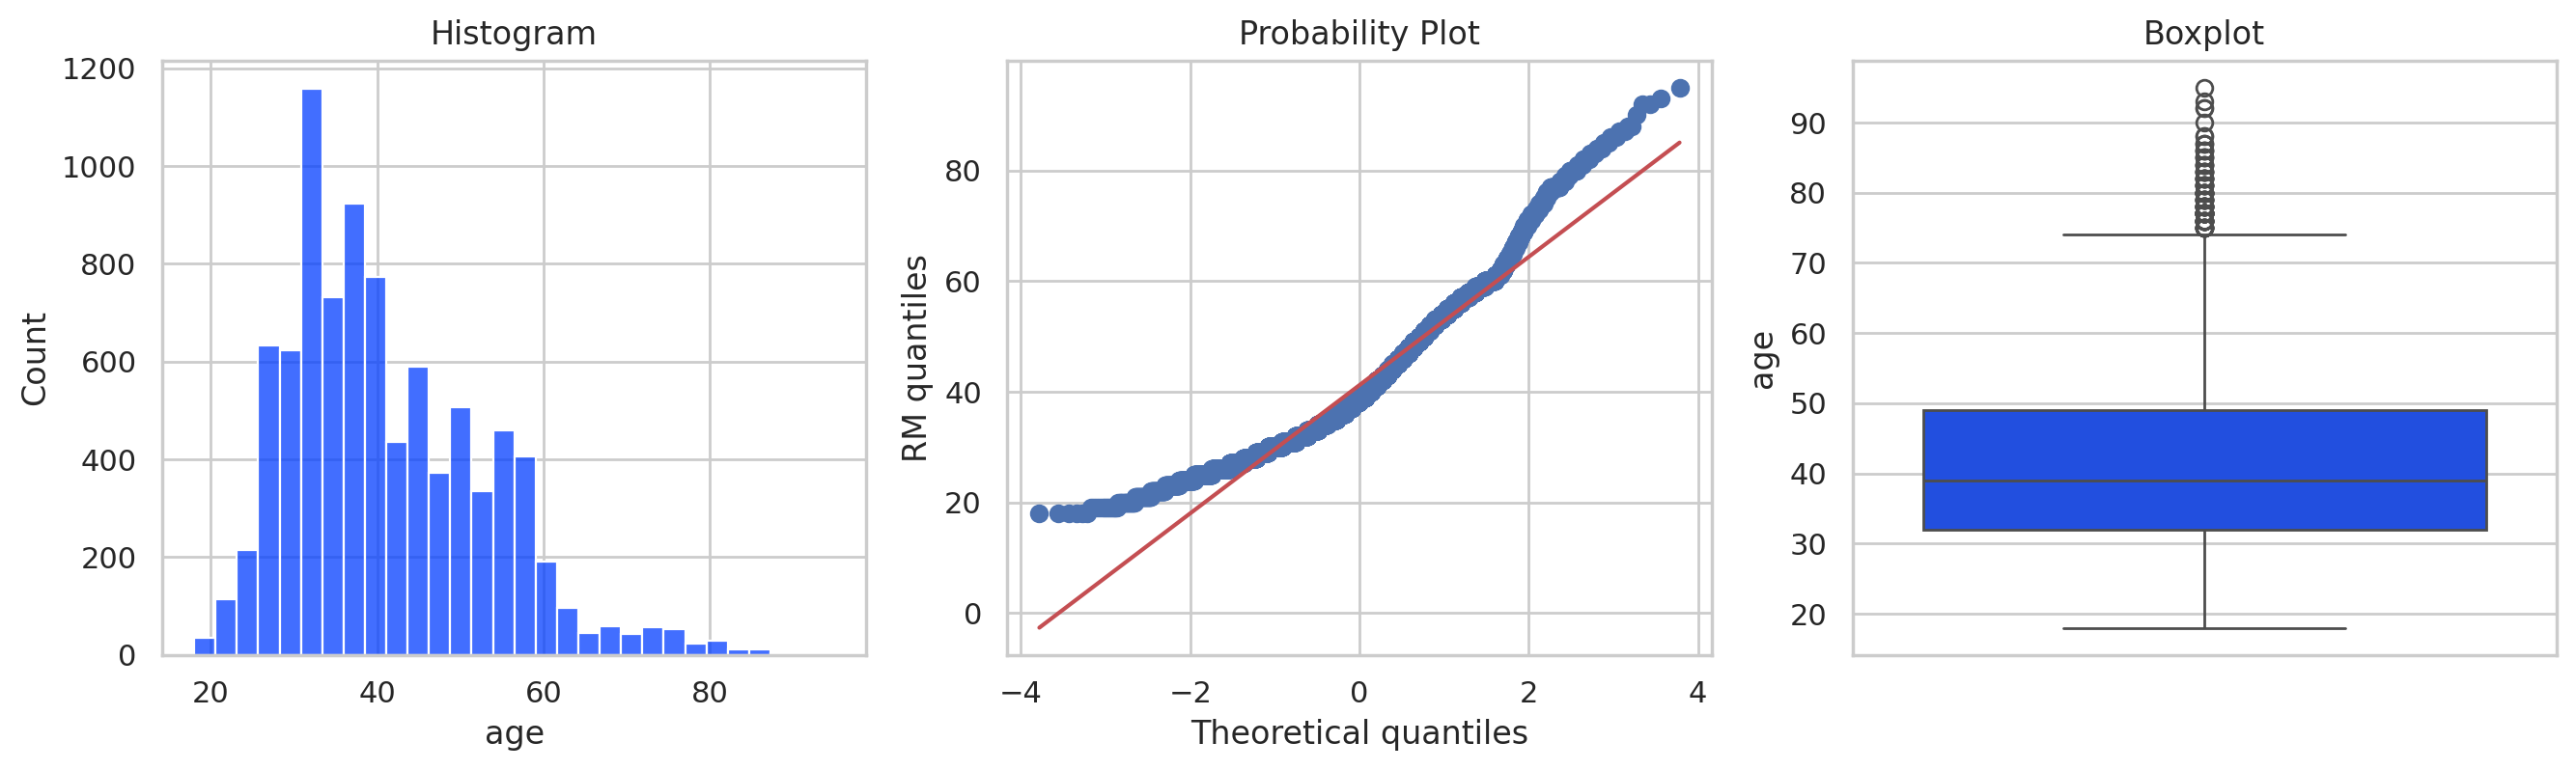

In [16]:
diagnostic_plots(X_train,"age")

distribusi umur dari customer merupakan distribusi yang normal

<Axes: xlabel='deposit', ylabel='age'>

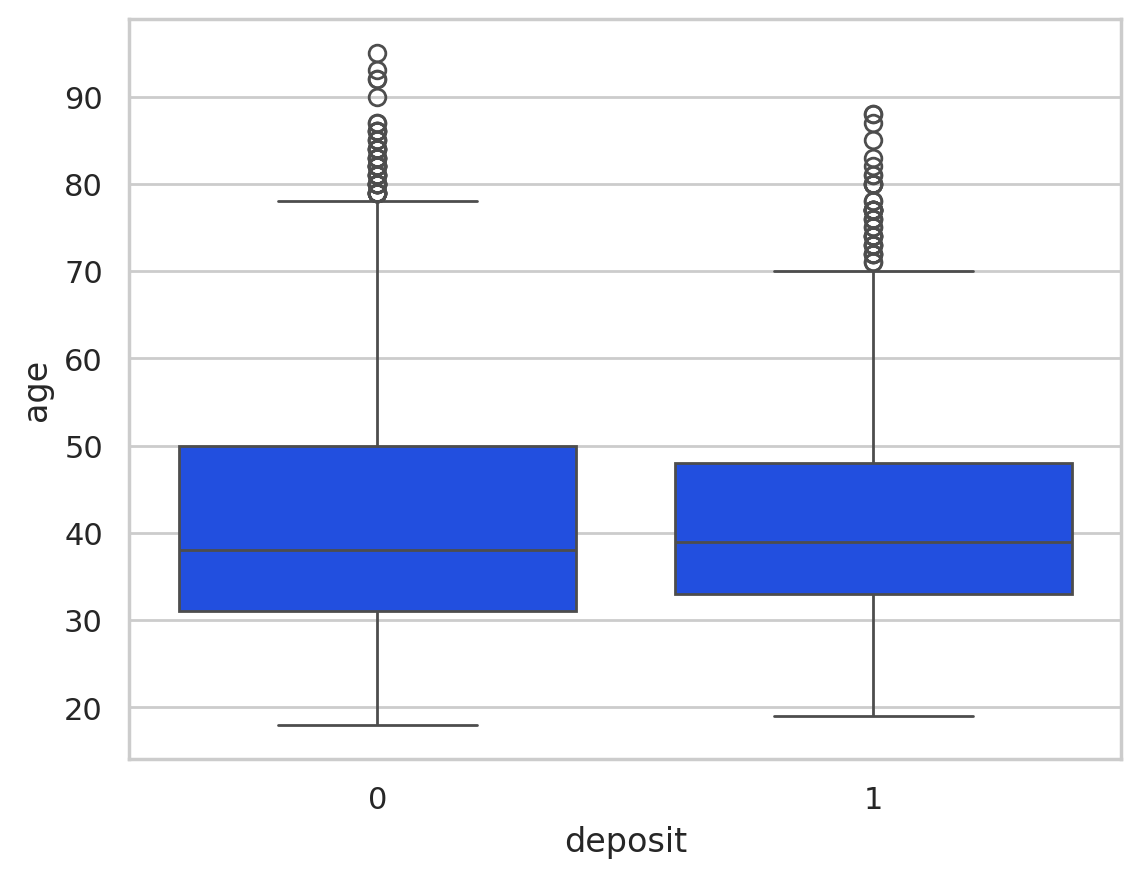

In [17]:
sns.boxplot(data=X_train,x="deposit",y='age')

secara median terlihat bahwa umur customer yang deposit adalah usia lebih tua dibandingkan customer yang tidak deposit

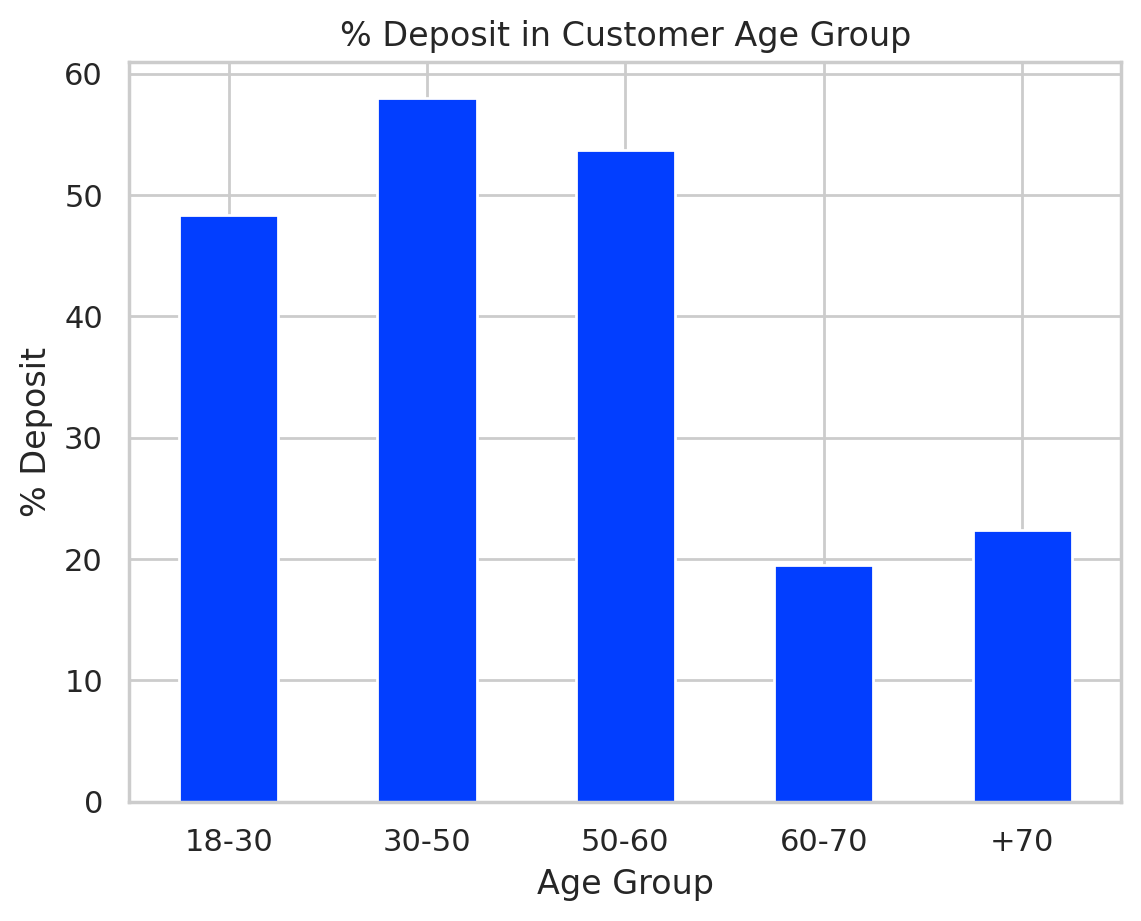

In [18]:
X_train["age_bin"] = pd.cut(X_train['age'], bins=5, labels=['18-30','30-50','50-60','60-70',"+70"])

(X_train.groupby("age_bin")["deposit"].mean()*100).plot(kind="bar").set_title("% Deposit in Customer Age Group")
plt.ylabel("% Deposit")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.show()


bedasarkan kelompok umur, persentase deposit yang besar berada pada kelompok 30-50

In [19]:
X_train.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,41.186695,1551.871094,15.637921,371.702990,2.514503,51.262403,0.824504,0.526151
std,11.898427,3358.479625,8.435319,345.736771,2.677238,108.765494,2.238521,0.499344
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,123.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,544.000000,15.000000,256.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,1697.000000,22.000000,494.000000,3.000000,9.000000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


## Apakah terdapat korelasi antara tingkat pendidikan dan balance?

0-40000            0.939299
less than 0        0.059917
more than 40000    0.000784
Name: balance_category, dtype: float64


([0, 1, 2],
 [Text(0, 0, '0-40000'),
  Text(1, 0, 'less than 0'),
  Text(2, 0, 'more than 40000')])

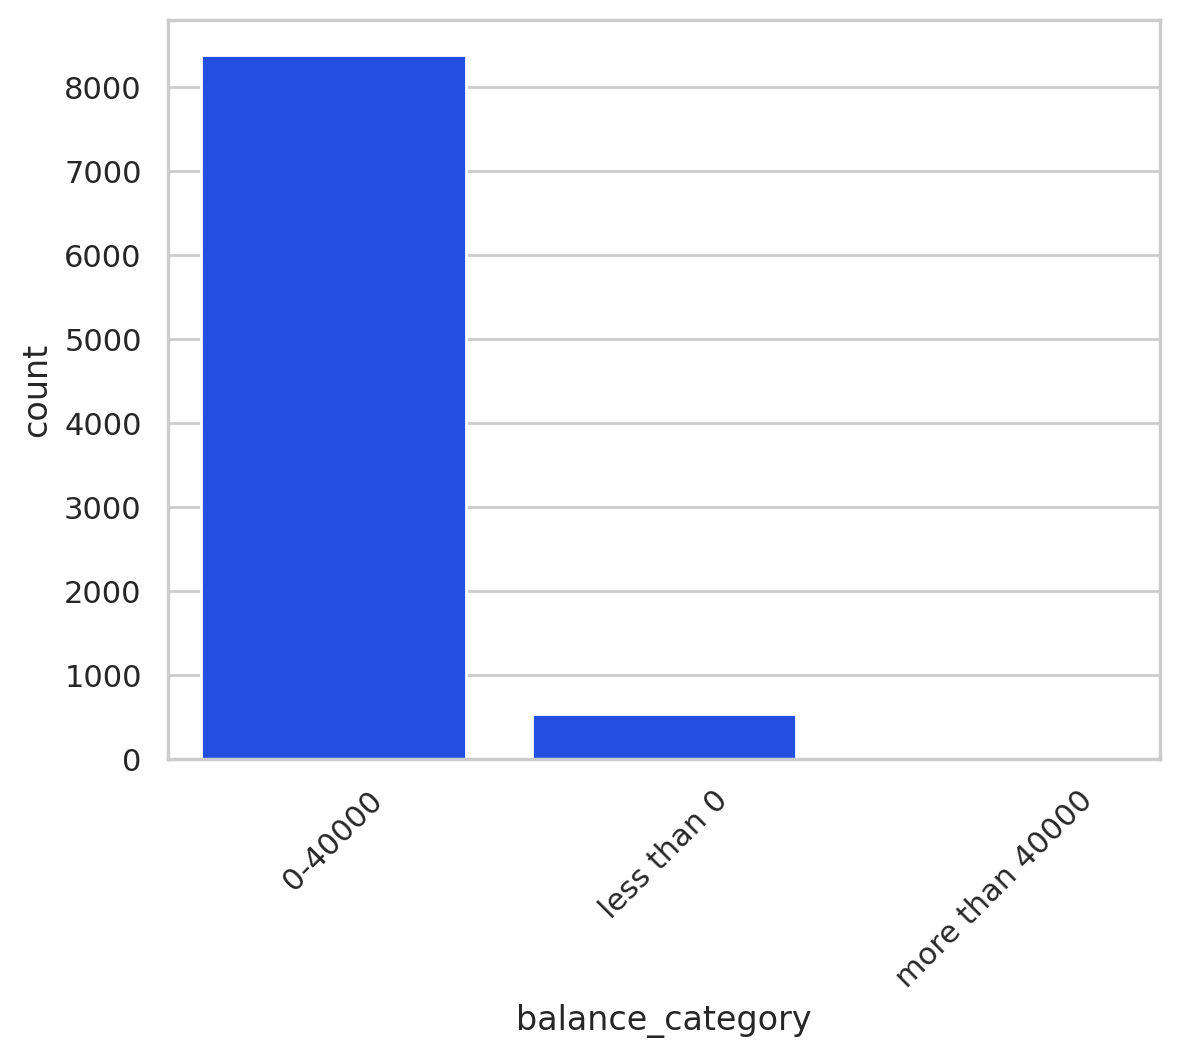

In [20]:
print(X_train["balance_category"].value_counts()/len(X_train))
sns.countplot(data=X_train,x='balance_category')
plt.xticks(rotation=45)

Dari visualisasi di atas, jika hanya menggunakan jumlah (count), mungkin sulit untuk merepresentasikan data secara jelas karena proporsi antar kategori mungkin tidak terlihat dengan jelas. Oleh karena itu, kita perlu merubah jumlahnya menjadi persentase untuk menghasilkan visualisasi yang lebih representatif.

In [21]:
X_train["balance_category"].unique()

array(['0-40000', 'less than 0', 'more than 40000'], dtype=object)

In [22]:
balance_edu = X_train[X_train['balance_category']!= 'Unknown'].copy()
balance_edu = balance_edu[balance_edu['education'] != 'Unknown']
balance_edu.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,balance_category,deposit,age_bin
4050,47,admin.,married,secondary,no,3676,no,no,cellular,18,oct,567,1,95,3,success,0-40000,0,30-50
4358,35,self-employed,married,secondary,no,188,yes,yes,unknown,5,jun,1865,2,-1,0,unknown,0-40000,0,30-50
9656,31,management,single,tertiary,no,713,no,no,cellular,28,aug,162,1,-1,0,unknown,0-40000,1,18-30
221,25,management,married,primary,no,168,yes,no,unknown,3,jun,801,1,-1,0,unknown,0-40000,0,18-30
1344,44,management,married,tertiary,no,1058,no,no,cellular,11,mar,188,3,-1,0,unknown,0-40000,0,30-50


In [23]:
X_train['balance_category'].unique()

array(['0-40000', 'less than 0', 'more than 40000'], dtype=object)

<Axes: xlabel='education'>

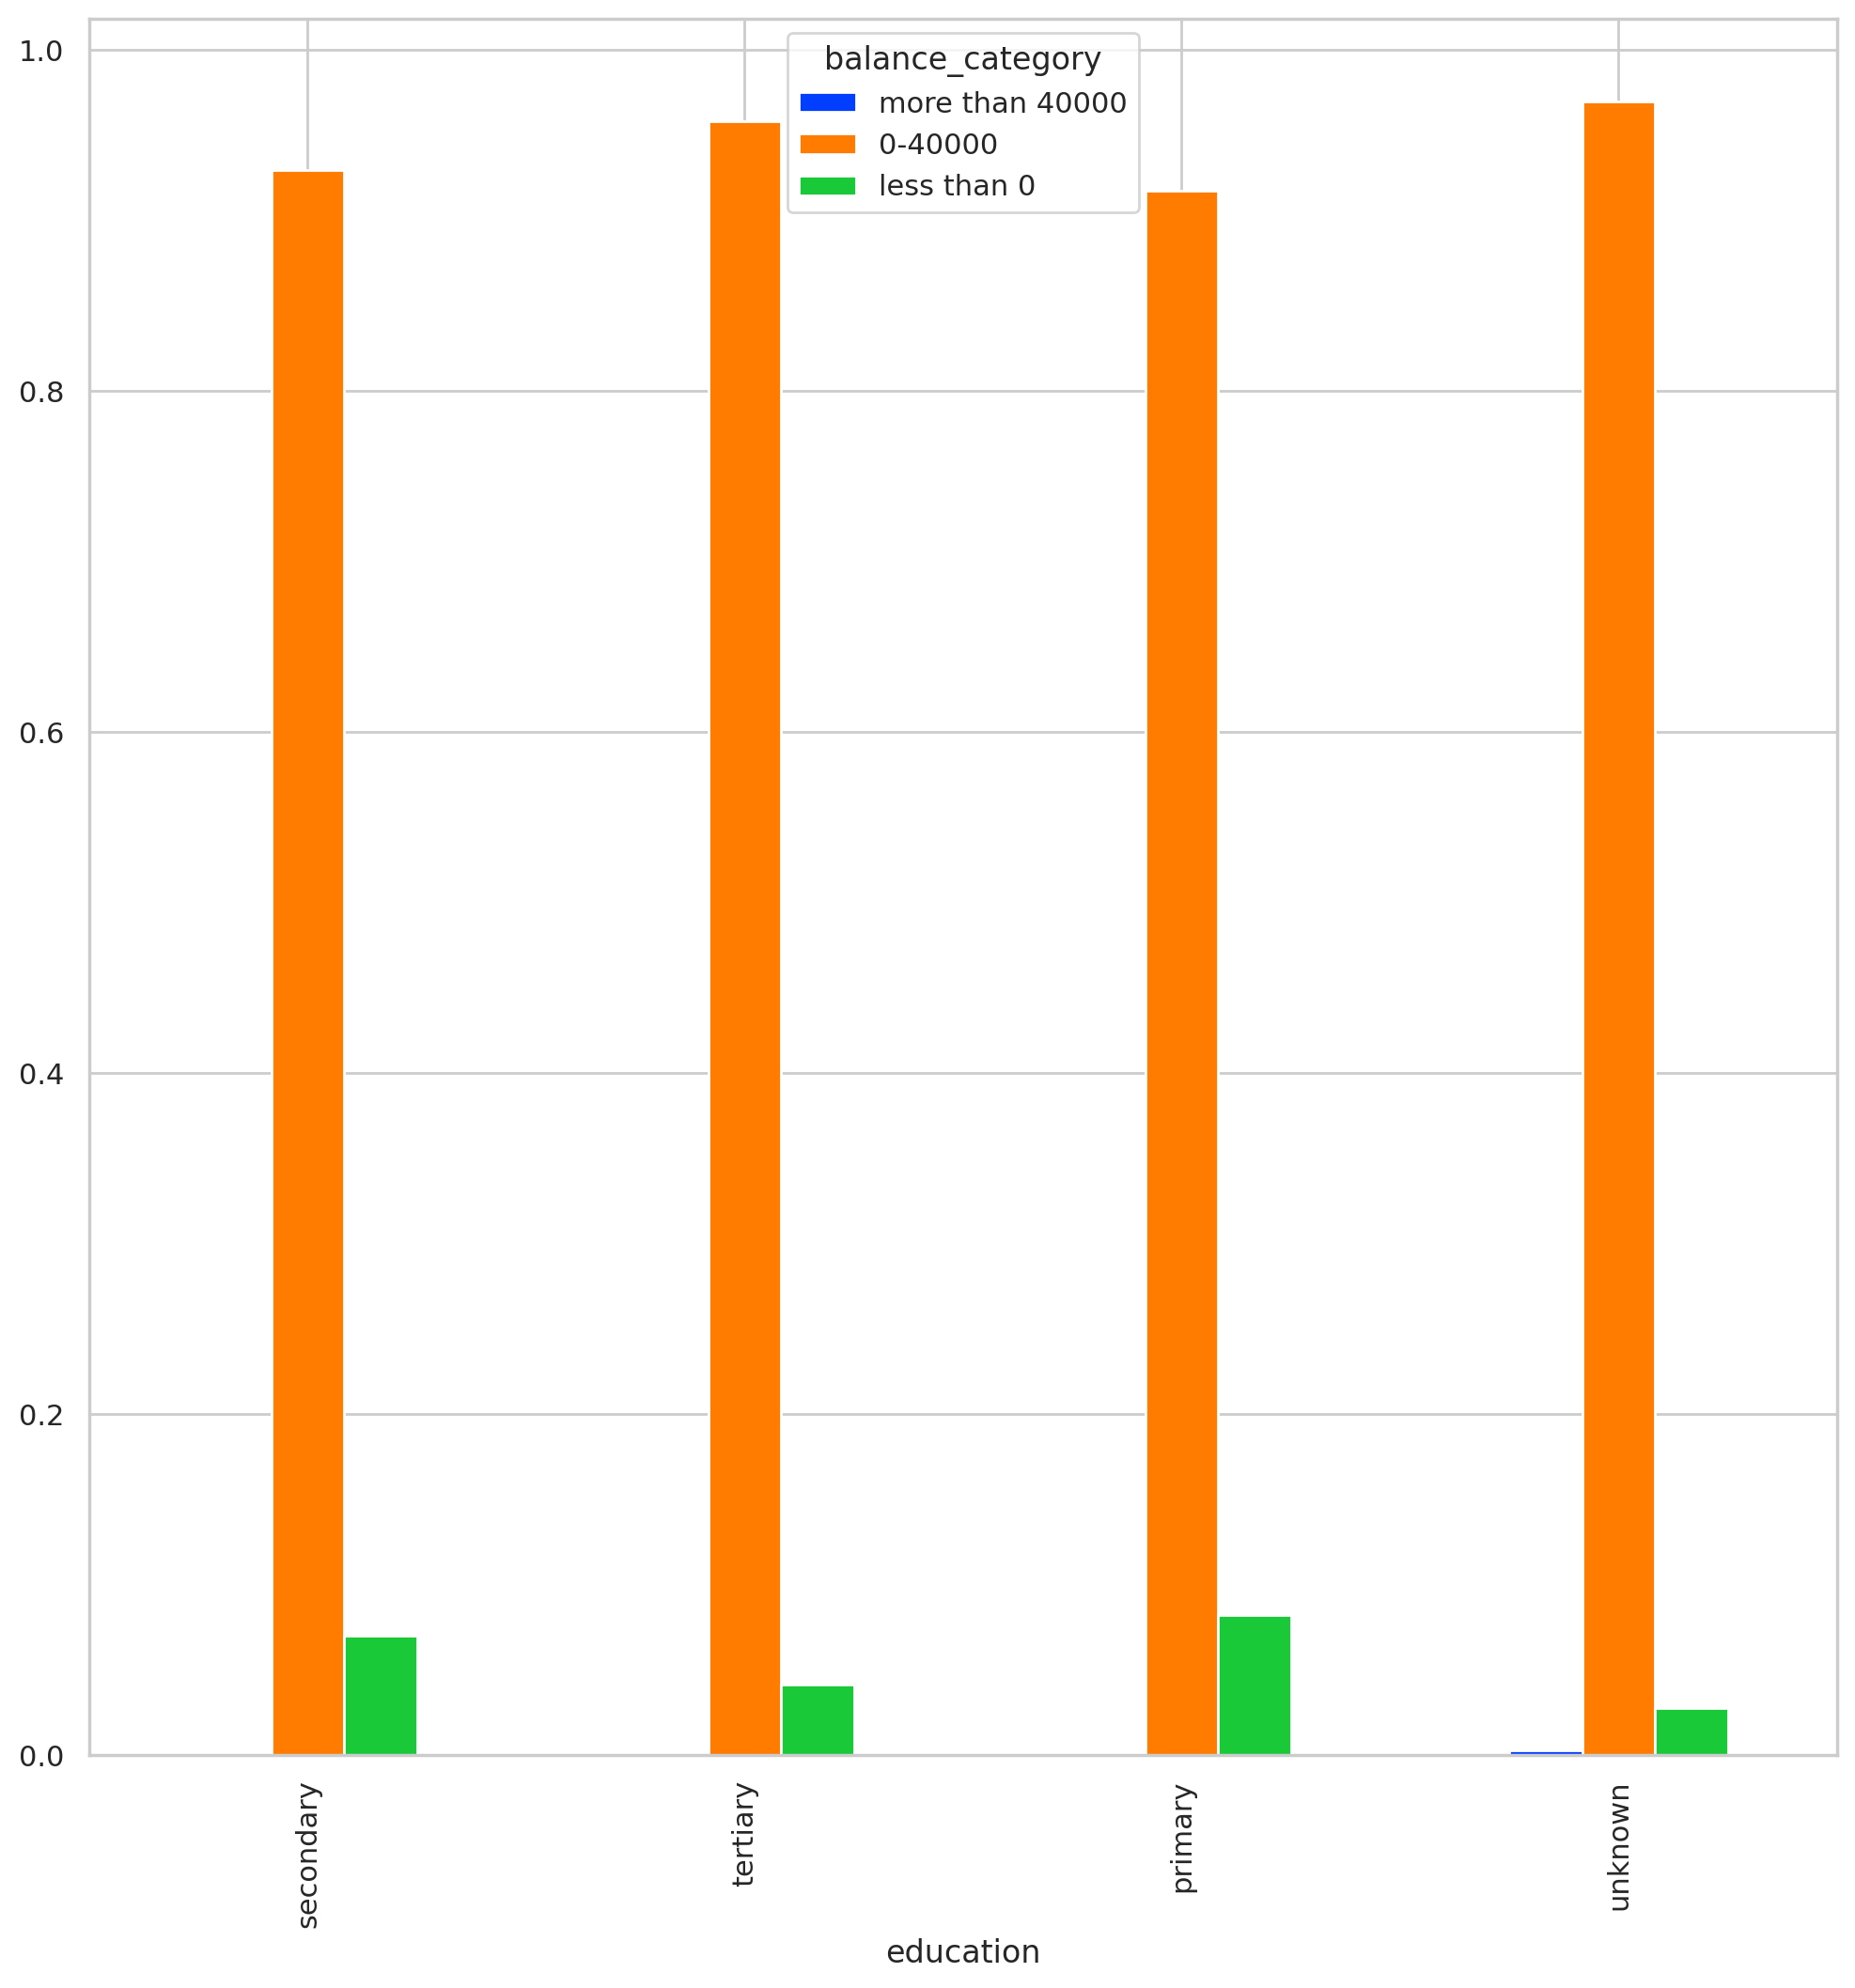

In [27]:
edu_balance = pd.crosstab(X_train["education"],X_train['balance_category']).apply(lambda x:x/x.sum(),axis=1).reindex(['less than 0','0-40000','more than 40000'],axis="columns")\
                                                                                                             [['more than 40000','0-40000','less than 0' ]]
order_edu = ['secondary', 'tertiary', 'primary', 'unknown']



edu_balance.loc[order_edu].plot(kind="bar",figsize=(12,12))

sebaran balance terlihat acak dengan tingkat pendidikan sepertinya tidak terdapat korelasi antara saldo dengan tingkat pendidikan

In [ ]:
balance_edu['education'] = balance_edu['education'].replace(['secondary', 'tertiary', 'primary', 'Unknown'],
                                                            [2,3,1,0])
balance_edu["balance_category"] = balance_edu["balance_category"].replace(['less than 0','0-20000','20001-40000','40001-60000','more than 60000'],
                                                                          [1,2,3,4,5])

In [ ]:
#correlation test education and balance
#Ho : tidak ada korelasi balance dan level edukasi
#H1 : terdapat korelasi balance dan level edukasi

from scipy.stats import kendalltau
(tau,pvalue) = kendalltau(df["education"],df["balance_category"])

print(f"Tau correlation coefficient {tau}")
print(f'P-value test {pvalue}')

Tau correlation coefficient -0.06690257610235205
P-value test 7.15865340156808e-14


Dari hasil uji hiphotesis testing kendall tau, tidak terdapat hubungan antara saldo dengan tingkat pendidikan

## Bagaimana korelasi dari pendidikan tersebut terhadap deposito?

Text(0, 0.5, '% Deposit')

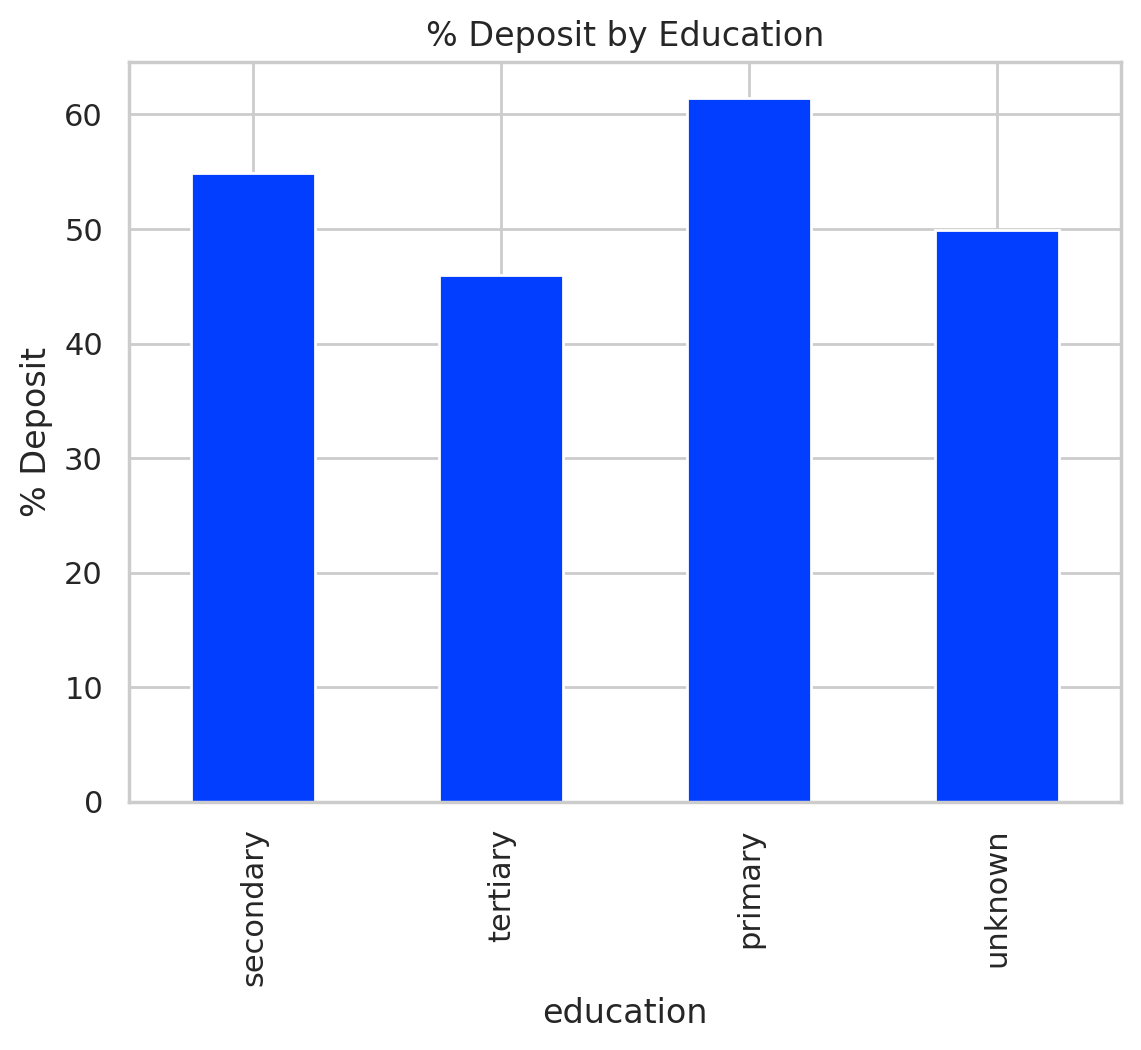

In [ ]:
#education level
other_edu = ['secondary', 'tertiary', 'primary', 'unknown']

(X_train.groupby("education")["deposit"].mean()*100).loc[other_edu].plot(kind='bar').set_title("% Deposit by Education")
plt.ylabel("% Deposit")

Jika diamati, terdapat hubungan non-linear antara tingkat pendidikan dan persentase deposito. Persentase deposito cenderung tinggi pada tingkat pendidikan dasar, kemudian mengalami penurunan pada tingkat menengah bawah dan atas, namun kembali meningkat sedikit pada nasabah dengan tingkat pendidikan sarjana.<br>

Ada beberapa faktor yang mungkin menyebabkan orang dengan tingkat pendidikan yang lebih tinggi cenderung agak kurang tertarik untuk melakukan deposito dibandingkan dengan mereka yang memiliki tingkat pendidikan yang lebih rendah. Beberapa faktor yang mungkin mempengaruhi termasuk:<br>

1. Tingkat Risiko: Orang dengan pendidikan tinggi mungkin lebih cenderung memahami risiko dan keuntungan dari berbagai instrumen investasi. Mereka mungkin lebih memilih investasi yang berisiko lebih tinggi namun memiliki potensi keuntungan yang lebih besar daripada deposito yang cenderung memberikan keuntungan yang lebih rendah namun lebih stabil.

2. Pengetahuan Finansial: Orang dengan pendidikan tinggi mungkin memiliki pengetahuan finansial yang lebih baik dan kemampuan untuk mengelola keuangan mereka sendiri. Mereka mungkin lebih cenderung menggunakan instrumen investasi lain yang mereka anggap lebih menguntungkan atau sesuai dengan tujuan keuangan mereka.

3. Tujuan Keuangan: Orang dengan pendidikan tinggi mungkin memiliki tujuan keuangan yang lebih kompleks atau berbeda daripada mereka yang memiliki pendidikan yang lebih rendah. Mereka mungkin memiliki prioritas investasi yang berbeda atau memilih untuk menggunakan dana mereka untuk tujuan lain seperti pendidikan lanjutan, investasi dalam bisnis, atau pembelian properti.

4. Akses ke Informasi: Orang dengan pendidikan tinggi mungkin lebih mudah mendapatkan informasi tentang berbagai instrumen investasi dan memiliki akses yang lebih baik ke pasar keuangan. Hal ini dapat membuat mereka lebih cenderung untuk memilih investasi yang lebih beragam daripada hanya bergantung pada deposito.

5. Kebutuhan Likuiditas: Orang dengan pendidikan tinggi mungkin memiliki kebutuhan likuiditas yang lebih tinggi atau kebutuhan untuk mengakses dana mereka dengan cepat dalam situasi darurat atau untuk kesempatan investasi yang cepat. Deposit mungkin dianggap terlalu mengikat dana mereka dalam jangka waktu tertentu.

In [ ]:
#balance category
X_train["balance_category"].unique()

array(['0-40000', 'less than 0', 'more than 40000'], dtype=object)

Jumlah nasabah yang deposito dan tidak deposito berdasarkan balance:
deposit              0     1  % Deposit
balance_category                       
less than 0        164   371  30.654206
0-40000           4063  4324  48.444021
more than 40000      4     3  57.142857


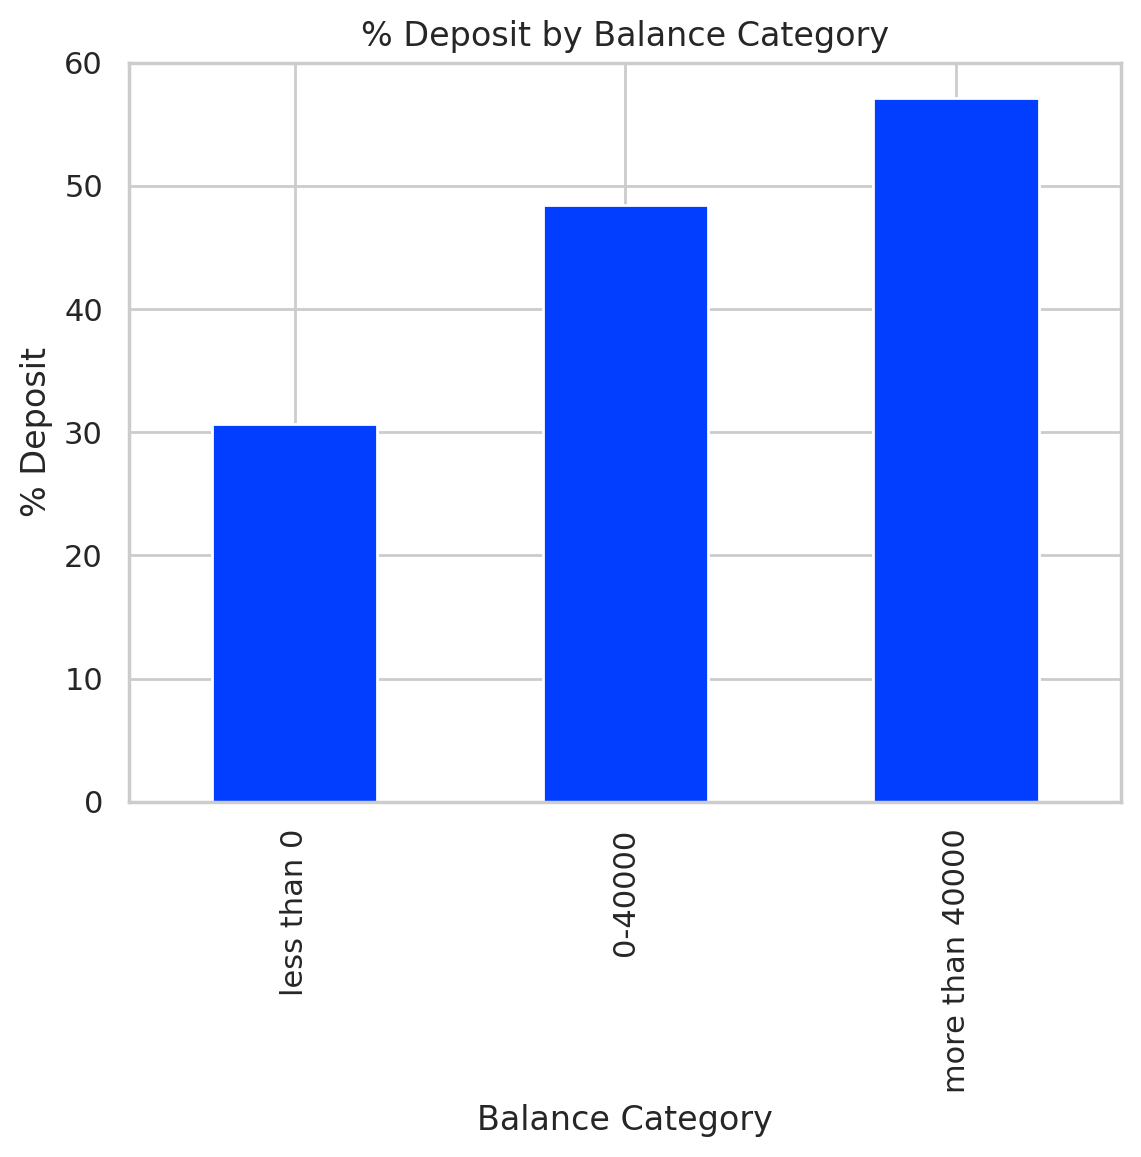

In [ ]:
# Menghitung jumlah nasabah yang melakukan deposito dan tidak deposito berdasarkan kategori saldo
deposit_by_balance = X_train.groupby(['balance_category', 'deposit']).size().unstack(fill_value=0)

# Menghitung persentase deposito untuk setiap kategori saldo
deposit_by_balance['% Deposit'] = (deposit_by_balance[0] / (deposit_by_balance[0] + deposit_by_balance[1])) * 100

# Mengurutkan hasil berdasarkan persentase deposito
deposit_by_balance = deposit_by_balance.sort_values('% Deposit')

print("Jumlah nasabah yang deposito dan tidak deposito berdasarkan balance:")
print(deposit_by_balance)

# Plotting
deposit_by_balance['% Deposit'].plot(kind='bar', title="% Deposit by Balance Category")
plt.ylabel("% Deposit")
plt.xlabel("Balance Category")
plt.show()


Hubungan antara kategori saldo (balance category) dan deposit bersifat linear. Nasabah dengan kategori saldo lebih dari 40000 tampaknya menjadi target yang menjanjikan karena memiliki persentase deposit yang tinggi, menunjukkan pola perilaku yang menarik. Hal ini dapat dijelaskan oleh beberapa alasan:

1. **Stabilitas Keuangan**: Nasabah dengan saldo yang besar cenderung memiliki stabilitas keuangan yang lebih tinggi, memungkinkan mereka untuk melakukan deposito dengan jumlah yang signifikan.

2. **Kemampuan Investasi**: Nasabah yang memiliki saldo besar mungkin lebih mampu untuk berinvestasi dan menempatkan sebagian dari dana mereka dalam deposito, karena mereka memiliki lebih banyak sumber daya finansial untuk diinvestasikan.

3. **Tujuan Finansial**: Nasabah dengan saldo besar mungkin memiliki tujuan finansial jangka panjang yang lebih jelas, termasuk mengamankan dana mereka dalam deposito untuk keperluan masa depan.

4. **Kepercayaan Diri**: Nasabah yang memiliki saldo besar mungkin memiliki kepercayaan diri yang lebih besar terhadap kondisi finansial mereka, sehingga lebih nyaman untuk melakukan deposito dengan jumlah yang signifikan.

Faktor-faktor ini bersama-sama dapat menjelaskan mengapa nasabah dengan saldo lebih dari 40000 menjadi target yang menjanjikan untuk melakukan deposito dengan persentase yang tinggi.

## Apakah terdapat perbedaan yang signifikan antara marital (status perkawinan nasabah) dengan kemungkinan nasabah untuk deposito?

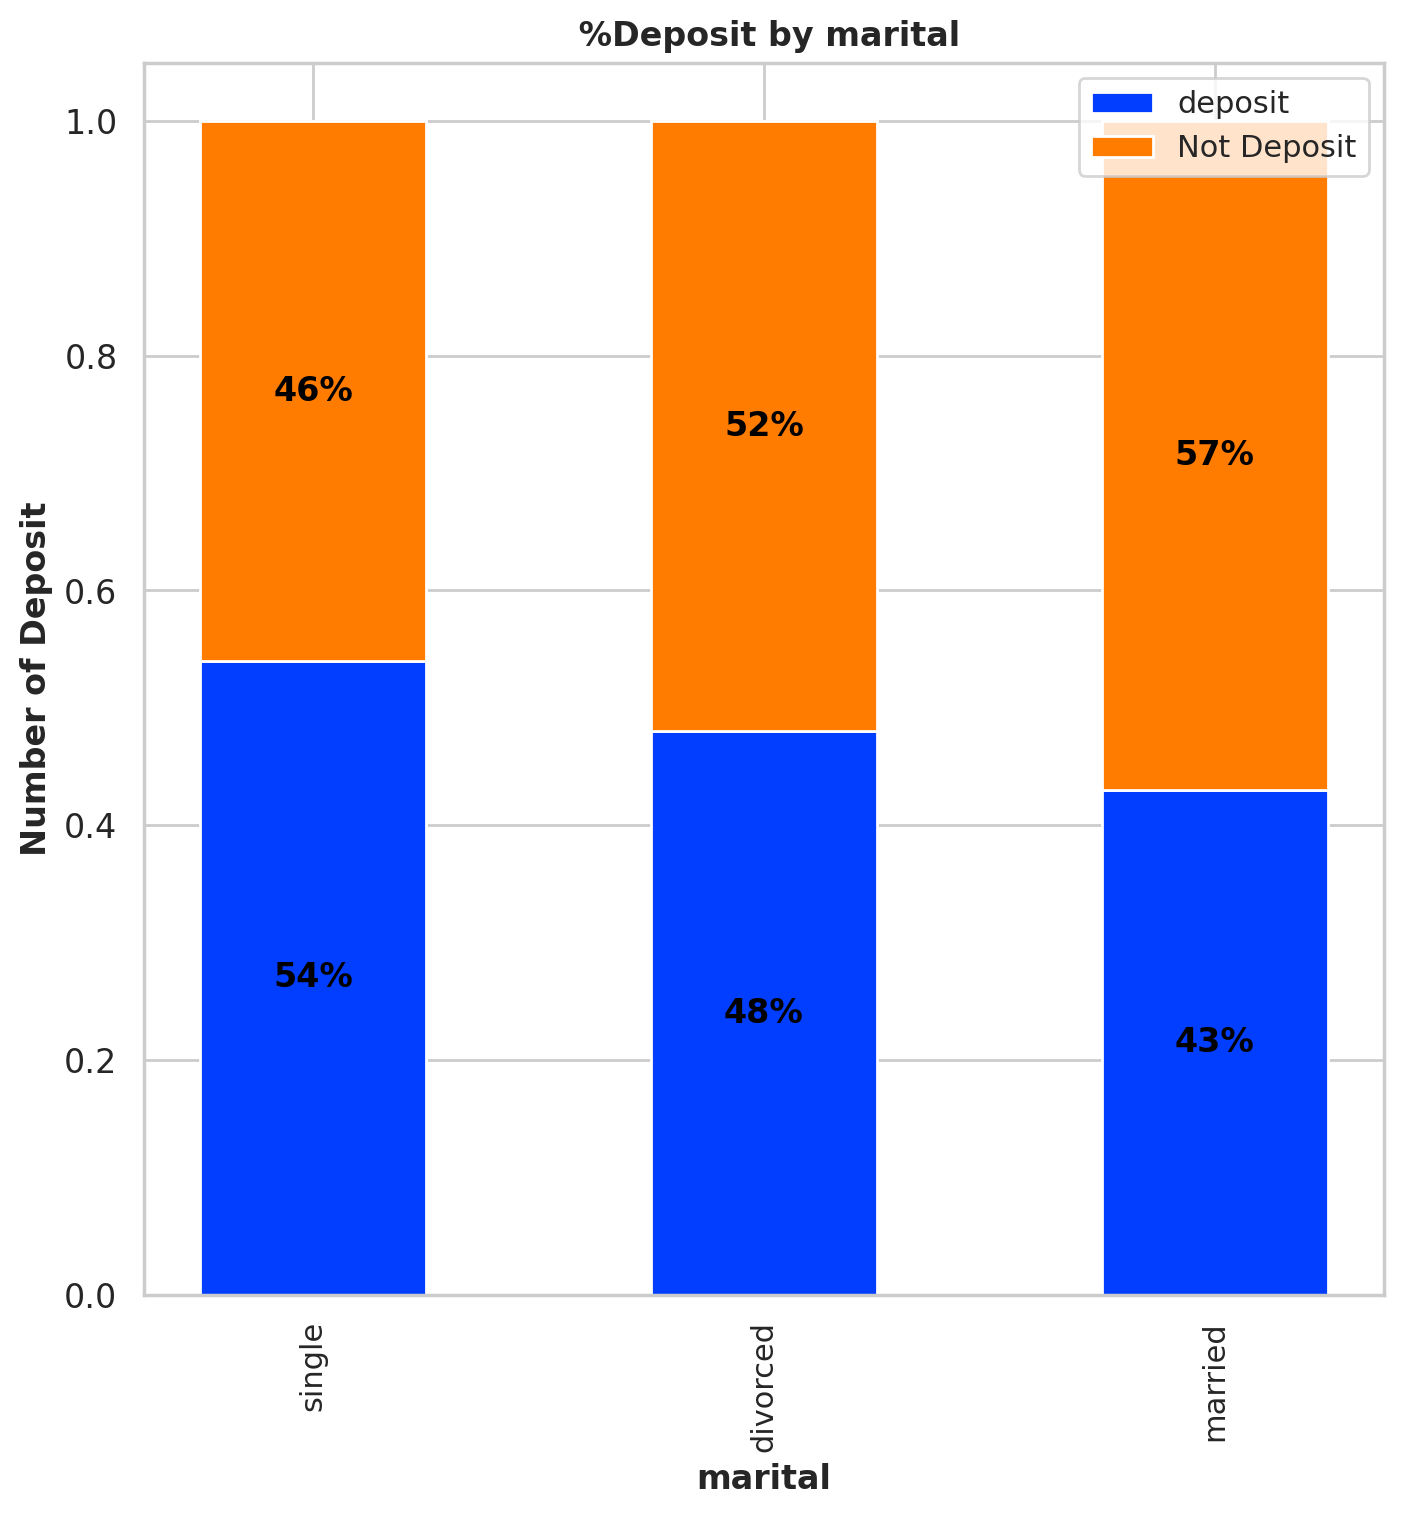

In [ ]:
create_stacked_bar_percent(df,'marital')

Dari segi persentase, tingkat deposito untuk nasabah dengan status perkawinan "single" lebih tinggi daripada nasabah yang status perkawinannya "divorced" dan "married". Tingkat deposito bagi nasabah dengan status perkawinan "single" mencapai 54%, sedangkan bagi nasabah "divorced" mencapai 48%, dan bagi nasabah "married" mencapai 43%. akan dibuktikan apakah perbedaannya signifikan secara statistik

In [ ]:
from scipy.stats import chi2_contingency
marital_deposit = pd.crosstab(X_train.marital,X_train.deposit)

#uji hipothesis
Ho = "tidak terdapat perbedaan signifikant deposit pada marital (status perkawinan)"
H1= "terdapat perbedaan signifikant deposit pada marital (status perkawinan)"

c, p, dof, expected = chi2_contingency(marital_deposit)

if p<0.05:
    print(H1,"karena p value kurang dari 0.05, p value is {}".format(p))
else:
    print(Ho,"karena p value lebih dari 0.05, p value is {}".format(p))

terdapat perbedaan signifikant deposit pada marital (status perkawinan) karena p value kurang dari 0.05, p value is 1.1424235822625474e-20


terdapat perbedaan siginifikan secara statistik antara marital dan deposit

## Apakah semakin sering kontak dilakukan kepada nasabah selama masa campaign, semakin besar kemungkinan bahwa nasabah tersebut akan membuka deposito? (frekuensi kontak)

<Axes: xlabel='deposit', ylabel='campaign'>

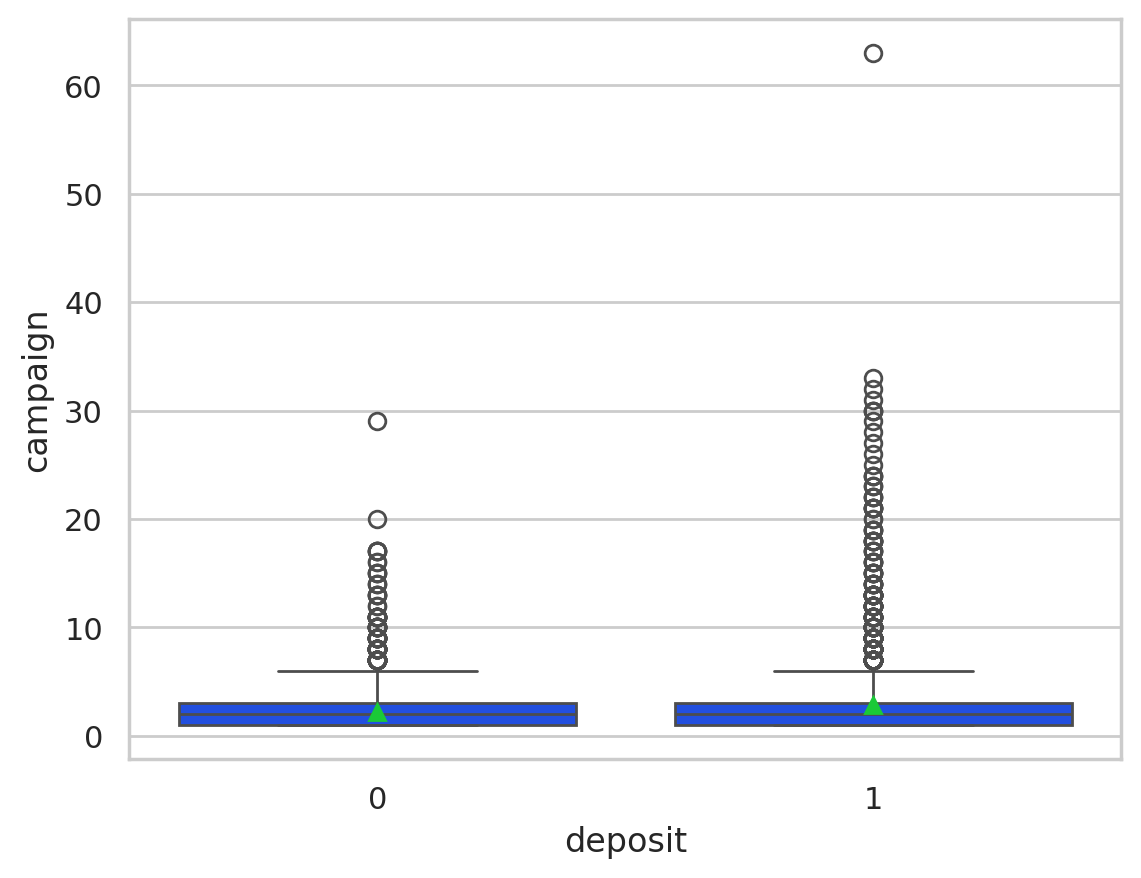

In [ ]:
sns.boxplot(data=X_train,x="deposit",y="campaign",showmeans=True)

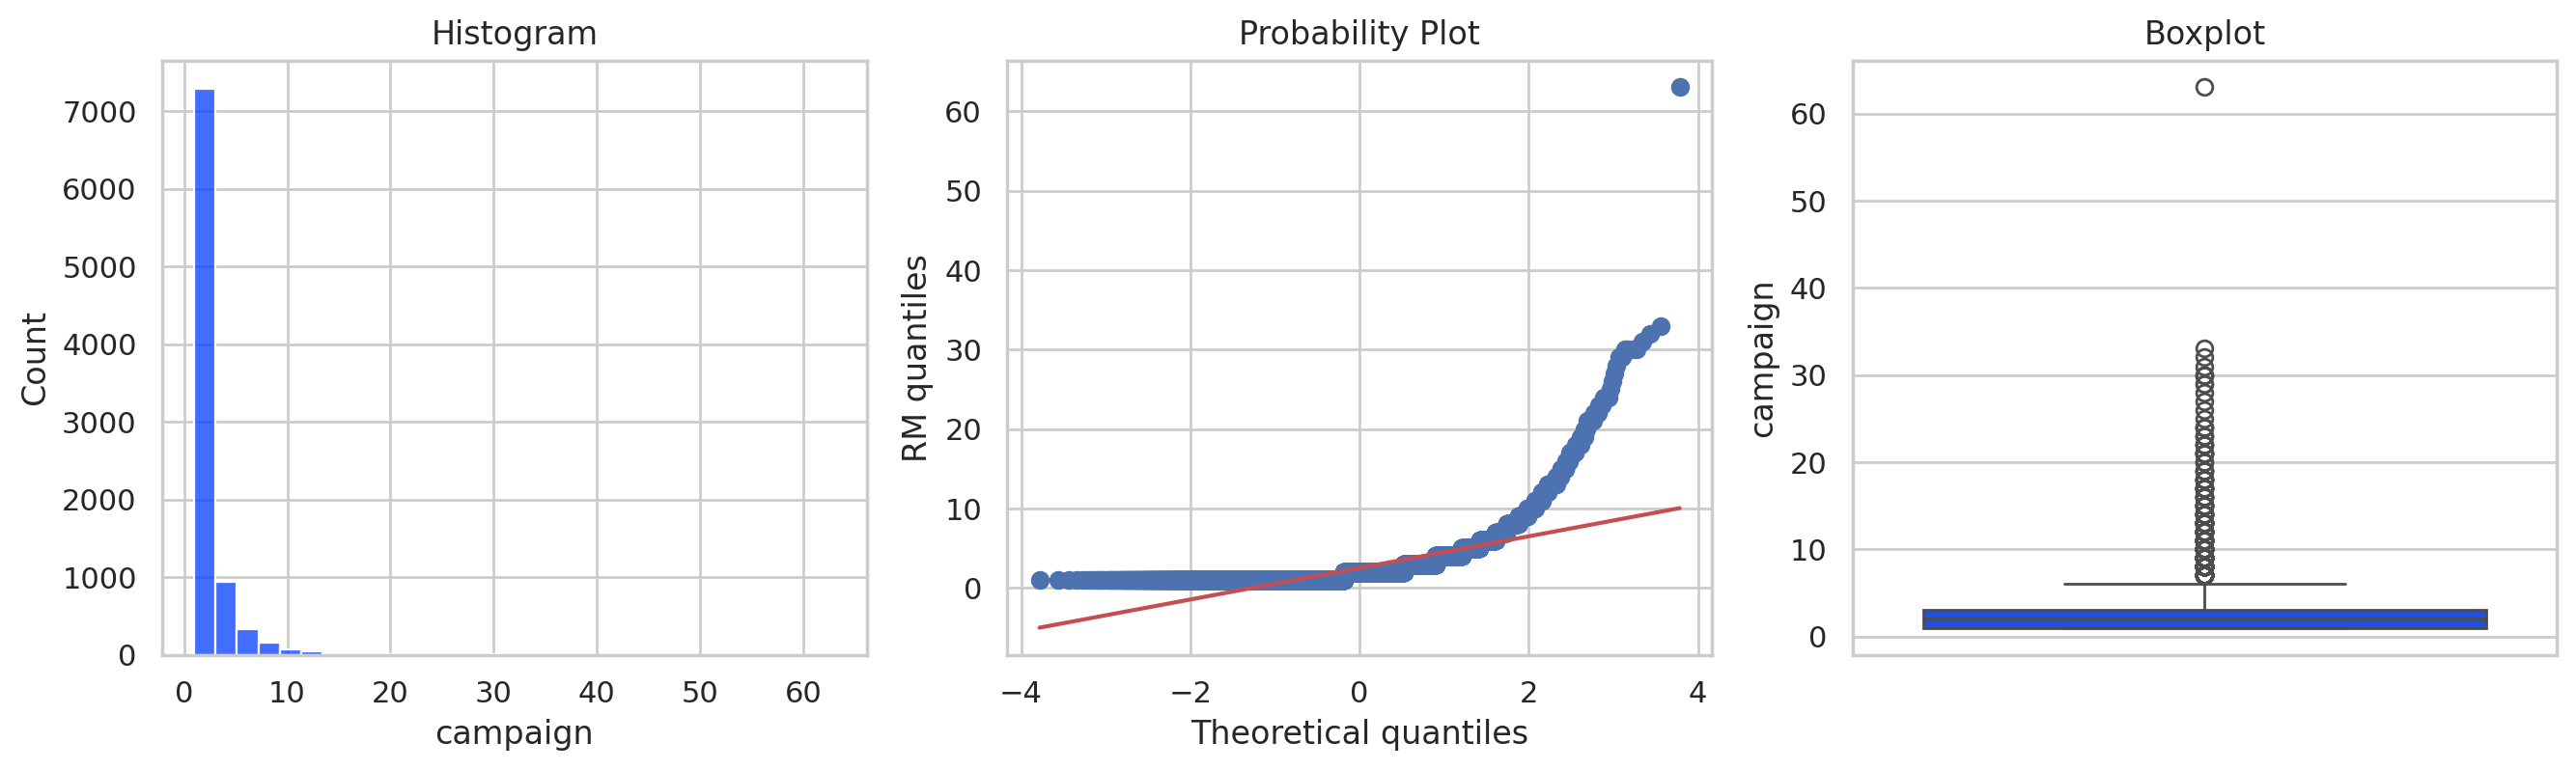

In [ ]:
diagnostic_plots(X_train,'campaign')

Gambar ini menampilkan **distribusi dan sebaran data dari suatu campaign**. Berikut adalah analisis lebih lanjut:

1. **Histogram** menunjukkan frekuensi kemunculan nilai-nilai campaign. Mayoritas data terkonsentrasi pada interval nilai rendah (0-10), dan ada penurunan tajam dalam frekuensi setelah interval pertama.
2. **Plot Probabilitas** menunjukkan deviasi data dari distribusi normal. Garis biru (data) menyimpang jauh dari garis merah (normal teoritis), menandakan bahwa data tidak mengikuti distribusi normal. Beberapa titik di ujung atas plot menunjukkan adanya *outlier* atau pengamatan ekstrem.
3. **Boxplot** menggambarkan rentang interkuartil dengan garis tengah sebagai median. Ada banyak titik di atas boxplot, menandakan adanya *outlier* dalam data. Rentang antarkuartil relatif kecil dibandingkan dengan seluruh rentang data.

Semua ini memberikan wawasan tentang bagaimana data campaign terdistribusi dan apakah ada nilai yang tidak biasa. 📊

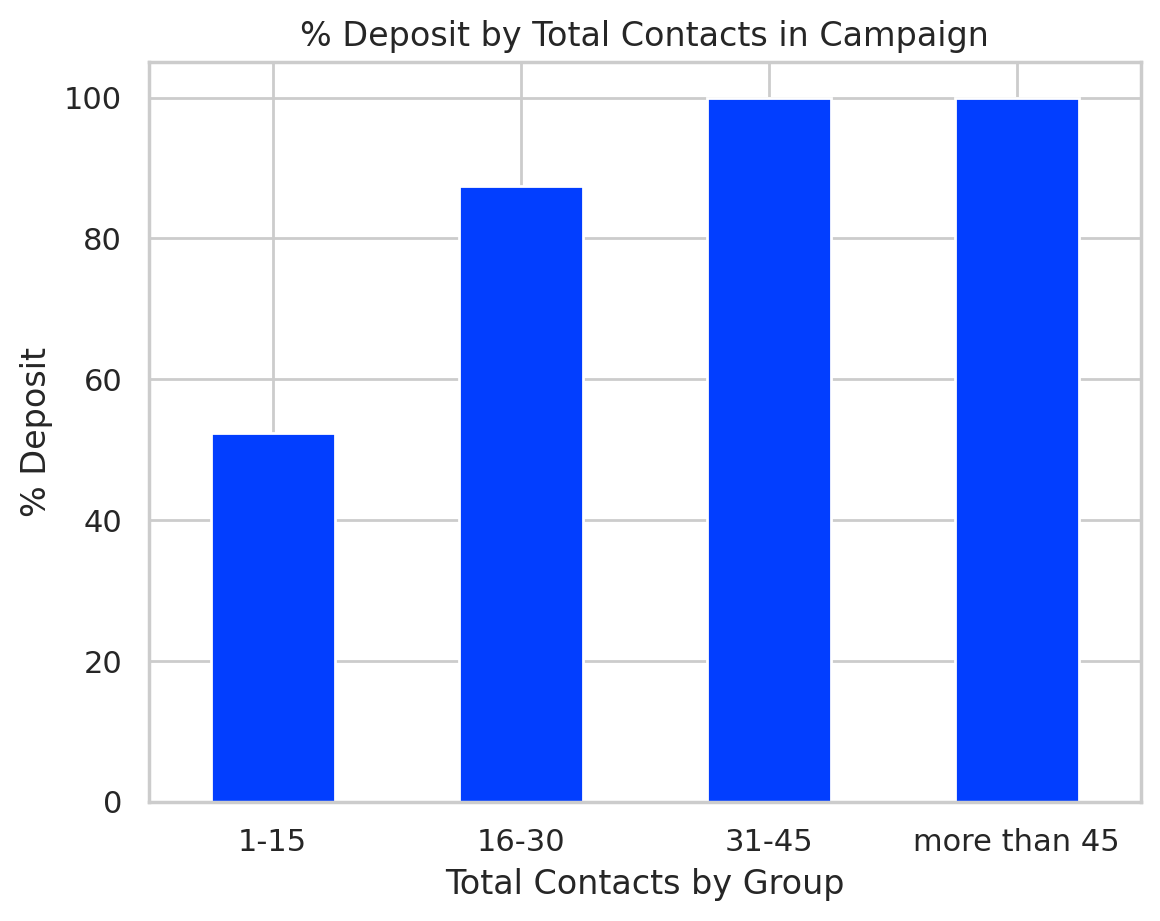

In [ ]:
X_train["total_contact_campaign"] = pd.cut(X_train['campaign'], bins=4, labels=['1-15','16-30', '31-45', 'more than 45'])
(X_train.groupby("total_contact_campaign")["deposit"].mean()*100).plot(kind='bar').set_title("% Deposit by Total Contacts in Campaign")
plt.ylabel("% Deposit")
plt.ylim(0)
plt.xlabel("Total Contacts by Group")
plt.xticks(rotation=0);

Terlihat bahwa semakin sering nasabah berinteraksi dengan bank, persentase nasabah yang membuka deposito juga meningkat. Persentase pembukaan deposito meningkat secara signifikan ketika jumlah interaksi mencapai lebih dari 30 kali menghubungi nasabah

In [ ]:
from scipy.stats import spearmanr
(sphr,pvalue) = spearmanr(X_train["campaign"],X_train["deposit"])

print(f"spearman correlation coefficient {sphr}")
print(f'P-value test {pvalue}')

spearman correlation coefficient 0.11934860371083382
P-value test 1.08674162558376e-29


Nilai Spearman correlation coefficient sebesar 0.11934860371083382 menunjukkan adanya hubungan yang sangat lemah antara jumlah kontak selama kampanye (kolom "campaign") dengan keputusan nasabah untuk membuka deposito (kolom "deposit"). Nilai ini mendekati 0, yang menunjukkan bahwa hubungan antara kedua variabel tersebut tidaklah kuat.

P-value test yang sangat kecil, yaitu 1.08674162558376e-29, menunjukkan bahwa korelasi yang diamati adalah signifikan secara statistik. Artinya, kita dapat mempercayai bahwa korelasi tersebut bukan hanya kebetulan semata, namun merupakan hasil dari hubungan yang ada di antara kedua variabel.

Jadi, meskipun korelasi antara jumlah kontak selama kampanye dan keputusan nasabah untuk membuka deposito lemah, namun secara statistik signifikan. Ini berarti ada hubungan yang lemah namun signifikan antara jumlah kontak dalam kampanye pemasaran dan keputusan nasabah untuk membuka deposito.

## Apakah lamanya waktu sejak kontak terakhir dengan nasabah mempengaruhi keputusan nasabah dalam membuka deposito? (waktu terakhir kontak)

In [ ]:
X_train['day_group'] = pd.cut(X_train['day'], bins=4, labels=['1-7 hari', '8-14 hari', '15-21 hari', '22-31 hari'])

In [ ]:
X_train.groupby("day_group").agg({"deposit":[len,"sum",'mean']})

deposit                
               len   sum      mean
day_group                         
1-7 hari      2327  1170  0.502793
8-14 hari     2472  1173  0.474515
15-21 hari    2293  1352  0.589621
22-31 hari    1837  1003  0.545999

(array([0, 1, 2, 3]),
 [Text(0, 0, '1-7 hari'),
  Text(1, 0, '8-14 hari'),
  Text(2, 0, '15-21 hari'),
  Text(3, 0, '22-31 hari')])

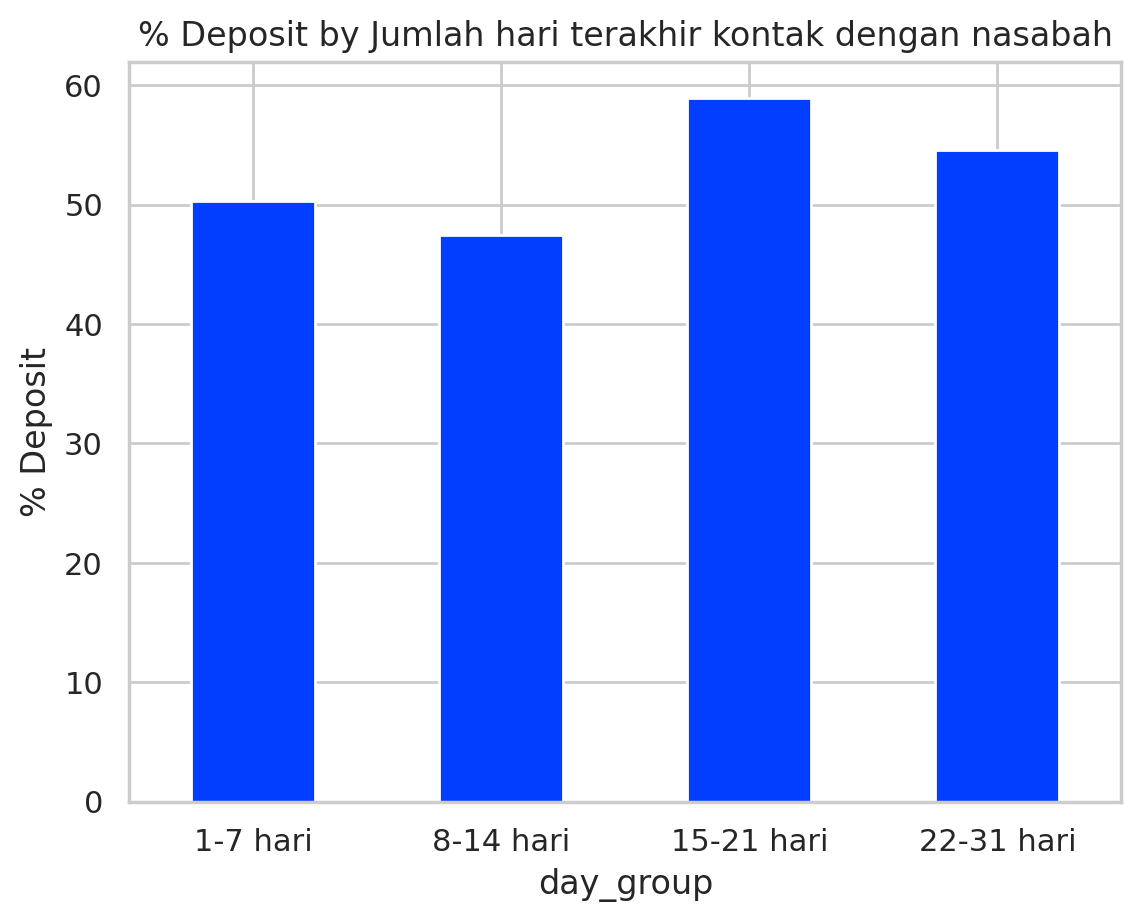

In [ ]:
(X_train.groupby("day_group")["deposit"].mean()*100).plot(kind="bar").set_title("% Deposit by Jumlah hari terakhir kontak dengan nasabah")
plt.ylabel("% Deposit")
plt.xticks(rotation=0)

Dalam rentang waktu 15 hingga 21 hari sebelum kontak terakhir, terjadi peningkatan yang signifikan dalam jumlah deposito yang dibuka oleh nasabah. Ini menunjukkan bahwa interaksi yang dilakukan dalam periode tersebut kemungkinan memiliki pengaruh yang positif terhadap keputusan nasabah untuk membuka deposito.

In [ ]:
(sphr,pvalue) = spearmanr(X_train["day"],X_train["deposit"])

print(f"spearman correlation coefficient {sphr}")
print(f'P-value test {pvalue}')

spearman correlation coefficient 0.06487087671862075
P-value test 8.49059340180675e-10



Dalam konteks statistik, Spearman correlation coefficient dan nilai P-value digunakan untuk mengevaluasi hubungan antara dua variabel. Spearman correlation coefficient mengukur kekuatan dan arah hubungan antara dua variabel, sementara P-value digunakan untuk menentukan signifikansinya.

Dalam kasus ini, Spearman correlation coefficient bernilai 0.0649, yang menunjukkan adanya hubungan positif yang lemah antara kedua variabel tersebut. Nilai P-value yang sangat kecil (8.49e-10) menunjukkan bahwa hubungan ini sangat signifikan secara statistik, artinya kemungkinan bahwa hubungan ini terjadi secara kebetulan sangat kecil.

Jadi, dalam konteks ini, representatif dari nilai-nilai tersebut adalah bahwa terdapat hubungan positif yang lemah antara kedua variabel, dan hubungan tersebut sangat signifikan secara statistik.

In [ ]:
missing_check(X_train)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
age,0,0.0,75,int64
job,0,0.0,12,object
marital,0,0.0,3,object
education,0,0.0,4,object
default,0,0.0,2,object
balance,0,0.0,3411,int64
housing,0,0.0,2,object
loan,0,0.0,2,object
contact,0,0.0,3,object
day,0,0.0,31,int64


# Eksplonatory Part 2


In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,balance_category,deposit,age_bin,total_contact_campaign,day_group
4050,47,admin.,married,secondary,no,3676,no,no,cellular,18,oct,567,1,95,3,success,0-40000,0,30-50,1-15,15-21 hari
4358,35,self-employed,married,secondary,no,188,yes,yes,unknown,5,jun,1865,2,-1,0,unknown,0-40000,0,30-50,1-15,1-7 hari
9656,31,management,single,tertiary,no,713,no,no,cellular,28,aug,162,1,-1,0,unknown,0-40000,1,18-30,1-15,22-31 hari
221,25,management,married,primary,no,168,yes,no,unknown,3,jun,801,1,-1,0,unknown,0-40000,0,18-30,1-15,1-7 hari
1344,44,management,married,tertiary,no,1058,no,no,cellular,11,mar,188,3,-1,0,unknown,0-40000,0,30-50,1-15,8-14 hari


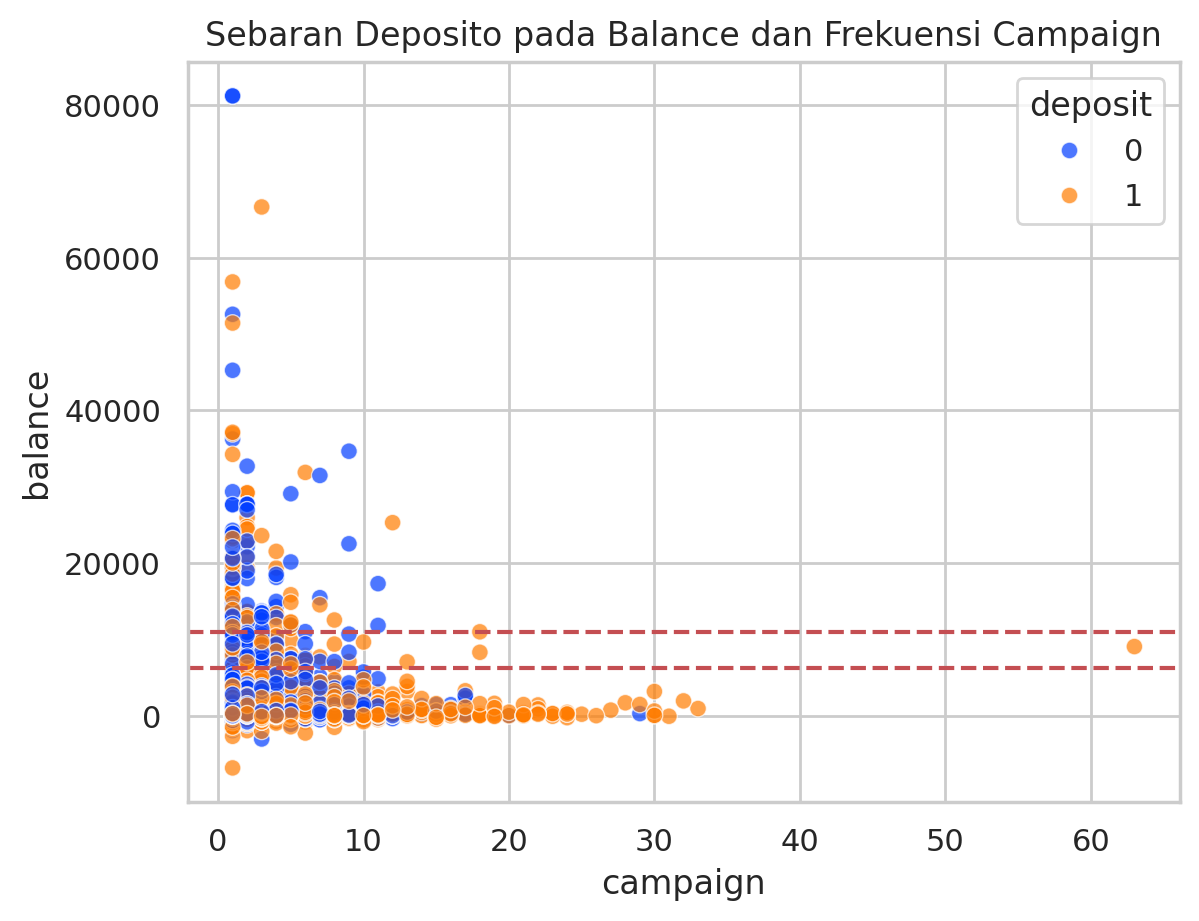

In [ ]:
sns.scatterplot(data=X_train,y="balance",x="campaign",hue='deposit',alpha=0.7).set_title("Sebaran Deposito pada Balance dan Frekuensi Campaign")
plt.axhline(y=6200,linestyle="--",color="r")
plt.axhline(y=11000,linestyle="--",color="r")

Dari **scatter plot** diatas, terlihat bahwa hubungan antara **frekuensi campaign** dan **balance** memiliki karakteristik eksponensial. Berikut adalah interpretasi lebih lanjut:

1. **Segmentasi Data**:
   - Terdapat **tiga segmen** berdasarkan scatterplot balance dan frekuensi campaign:
     1. **Segment 1**: Nasabah yang memiliki **balance rendah** (kurang dari 20000) dan **frekuensi campaign rendah** (kurang dari 20).
     2. **Segment 2**: Nasabah dengan **balance sedang** (antara 20000 hingga 40000) dan **frekuensi campaign sedang** (antara 20 hingga 40).
     3. **Segment 3**: Nasabah dengan **balance tinggi** (lebih dari 40000) dan **frekuensi campaign tinggi** (lebih dari 40).

2. **Eksponensial**:
   - Hubungan antara frekuensi campaign dan balance tampak **eksponensial** karena perubahan frekuensi campaign memiliki dampak yang signifikan pada nilai balance.

3. **Kesimpulan**:
   - Nasabah yang deposito cenderung memiliki balance sedang atau saldo di bawah 40000 dan frekuensinya di bawah 20.
   - Segmentasi ini dapat membantu dalam strategi pemasaran dan pengelolaan kampanye untuk meningkatkan jumlah deposito.


# Preprocessing

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,balance_category,deposit,age_bin,total_contact_campaign,day_group
4050,47,admin.,married,secondary,no,3676,no,no,cellular,18,oct,567,1,95,3,success,0-40000,0,30-50,1-15,15-21 hari
4358,35,self-employed,married,secondary,no,188,yes,yes,unknown,5,jun,1865,2,-1,0,unknown,0-40000,0,30-50,1-15,1-7 hari
9656,31,management,single,tertiary,no,713,no,no,cellular,28,aug,162,1,-1,0,unknown,0-40000,1,18-30,1-15,22-31 hari
221,25,management,married,primary,no,168,yes,no,unknown,3,jun,801,1,-1,0,unknown,0-40000,0,18-30,1-15,1-7 hari
1344,44,management,married,tertiary,no,1058,no,no,cellular,11,mar,188,3,-1,0,unknown,0-40000,0,30-50,1-15,8-14 hari


In [ ]:
X_train['age'].unique()

array([47, 35, 31, 25, 44, 34, 38, 36, 49, 32, 20, 30, 45, 83, 53, 24, 37,
       59, 52, 46, 29, 48, 56, 50, 42, 33, 40, 67, 26, 27, 51, 43, 60, 41,
       54, 28, 39, 85, 58, 57, 70, 22, 55, 62, 61, 23, 63, 21, 19, 82, 80,
       76, 66, 79, 74, 88, 68, 77, 64, 75, 78, 95, 72, 69, 71, 86, 73, 65,
       18, 81, 84, 92, 87, 90, 93])

In [ ]:
missing_check(X_train)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
age,0,0.0,75,int64
job,0,0.0,12,object
marital,0,0.0,3,object
education,0,0.0,4,object
default,0,0.0,2,object
balance,0,0.0,3411,int64
housing,0,0.0,2,object
loan,0,0.0,2,object
contact,0,0.0,3,object
day,0,0.0,31,int64


In [ ]:
#=====columns drop=====
drop_col = ["balance_category", "age_bin","day_group","total_contact_campaign"]
X_train  = X_train.drop(drop_col,axis=1)

In [ ]:
#====Ordinal Category=======
map_edu = {'unknown':0,
           'primary':1,
           'secondary':2,
           'tertiary':3}

map_poutcome = {'unknown':0,
                'success':1,
                'failure':2,
                'other':3}

map_job = {'admin.':0,
           'self-employed':1,
           'management':2,
           'entrepreneur':3,
           'unemployed':4,
           'student':5,
           'services':6,
           'technician':7,
           'retired':8,
           'blue-collar':9,
           'housemaid':10,
           'unknown':11}

map_default = {'yes':0,
               'no':1}
map_housing = {'yes':0,
               'no':1}
map_loan = {'yes':0,
            'no':1}

map_month = {'jan':0,
             'feb':1,
             'mar':2,
             'apr':3,
             'may':4,
             'jun':5,
             'jul':6,
             'aug':7,
             'sep':8,
             'oct':9,
             'nov':10,
             'dec':11}

map_contact = {'unknown':0,
               'cellular':1,
               'telephone':2}


#========Nominal Categoty======
nom_cat = ["marital"]
X_train = pd.get_dummies(X_train,columns=nom_cat,drop_first=True)

# Mapping untuk mengubah nilai kategori menjadi nilai numerik
X_train["education"] = X_train["education"].map(map_edu)
X_train["poutcome"] = X_train["poutcome"].map(map_poutcome)
X_train["job"] = X_train["job"].map(map_job)
X_train["balance"] = X_train["balance"]
X_train["age"] = X_train["age"]
X_train["day"] = X_train["day"]
X_train['campaign'] = X_train['campaign']
X_train['default'] = X_train['default'].map(map_default)
X_train['housing'] = X_train['housing'].map(map_housing)
X_train['loan'] = X_train['loan'].map(map_loan)
X_train['month'] = X_train['month'].map(map_month)
X_train['pdays'] = X_train['pdays']
X_train['previous'] = X_train['previous']
X_train['contact'] = X_train['contact'].map(map_contact)

In [ ]:
X_train.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital_married,marital_single
4050,47,0,2,1,3676,1,1,1,18,9,567,1,95,3,1,0,1,0
4358,35,1,2,1,188,0,0,0,5,5,1865,2,-1,0,0,0,1,0
9656,31,2,3,1,713,1,1,1,28,7,162,1,-1,0,0,1,0,1
221,25,2,1,1,168,0,1,0,3,5,801,1,-1,0,0,0,1,0
1344,44,2,3,1,1058,1,1,1,11,2,188,3,-1,0,0,0,1,0


In [ ]:
missing_check(X_train)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
age,0,0.0,75,int64
job,0,0.0,12,int64
education,0,0.0,4,int64
default,0,0.0,2,int64
balance,0,0.0,3411,int64
housing,0,0.0,2,int64
loan,0,0.0,2,int64
contact,0,0.0,3,int64
day,0,0.0,31,int64
month,0,0.0,12,int64


<Axes: >

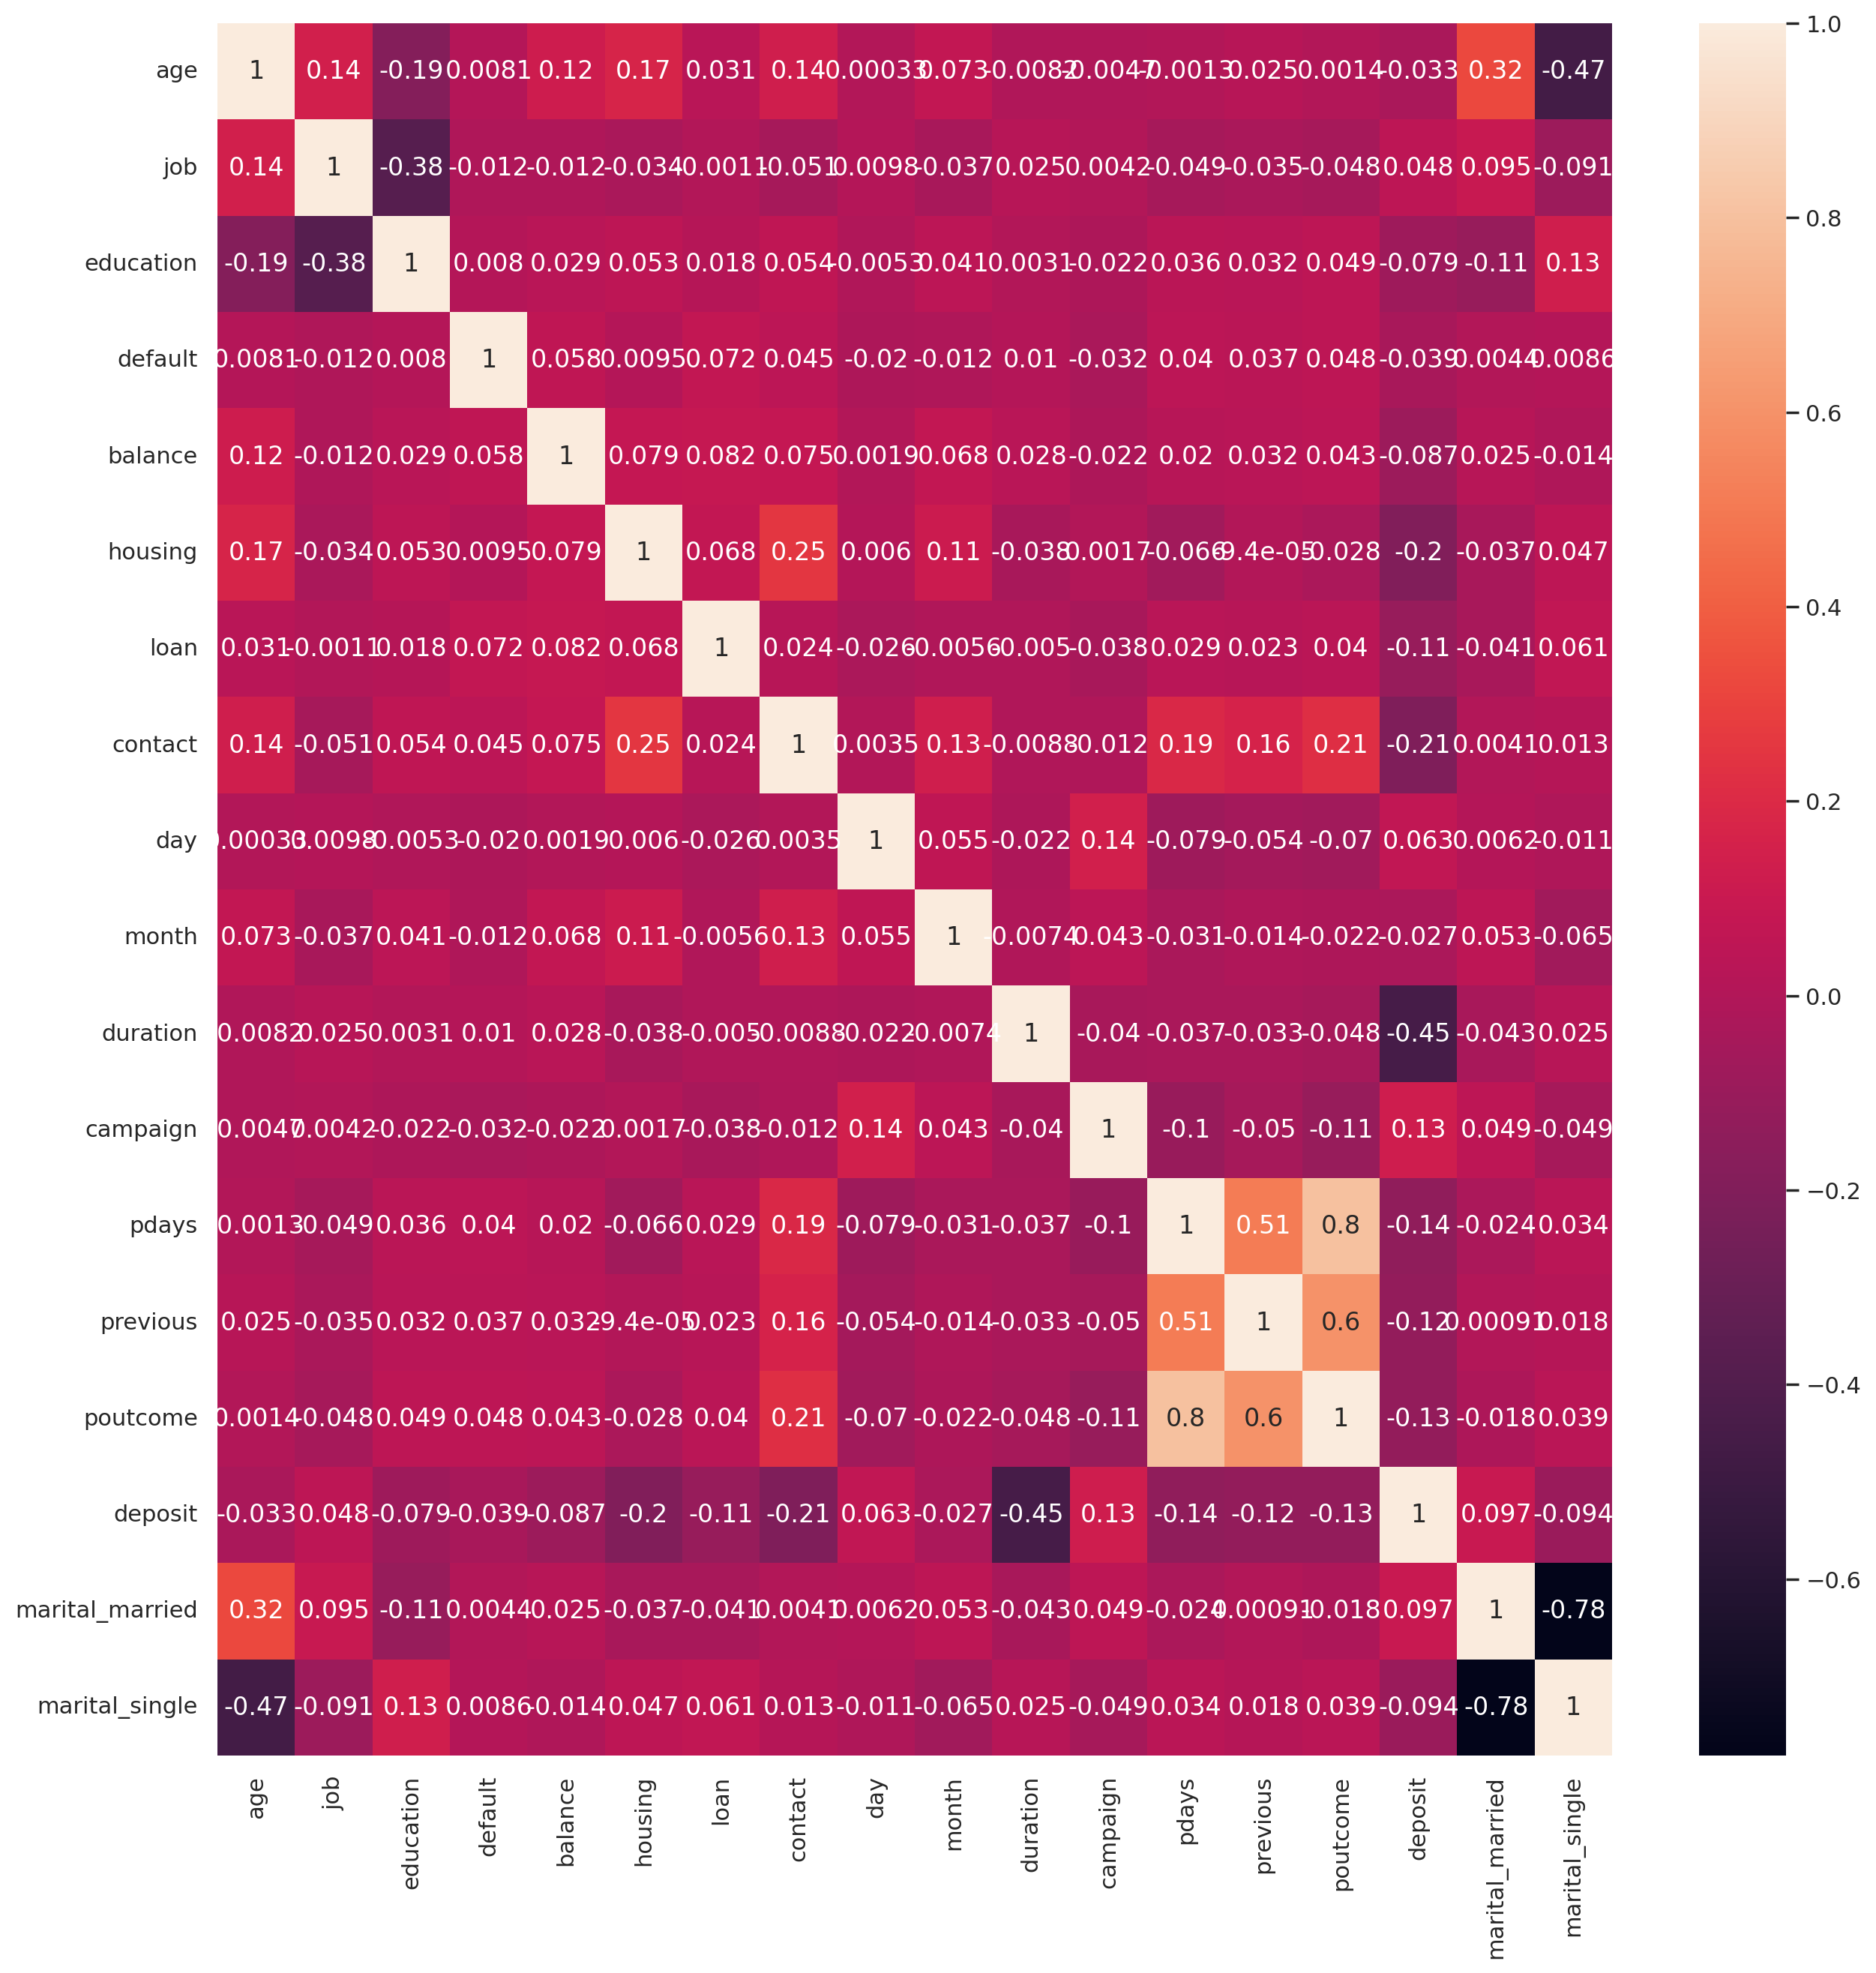

In [ ]:
#check correlation
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,fmt=".2g")

<Axes: >

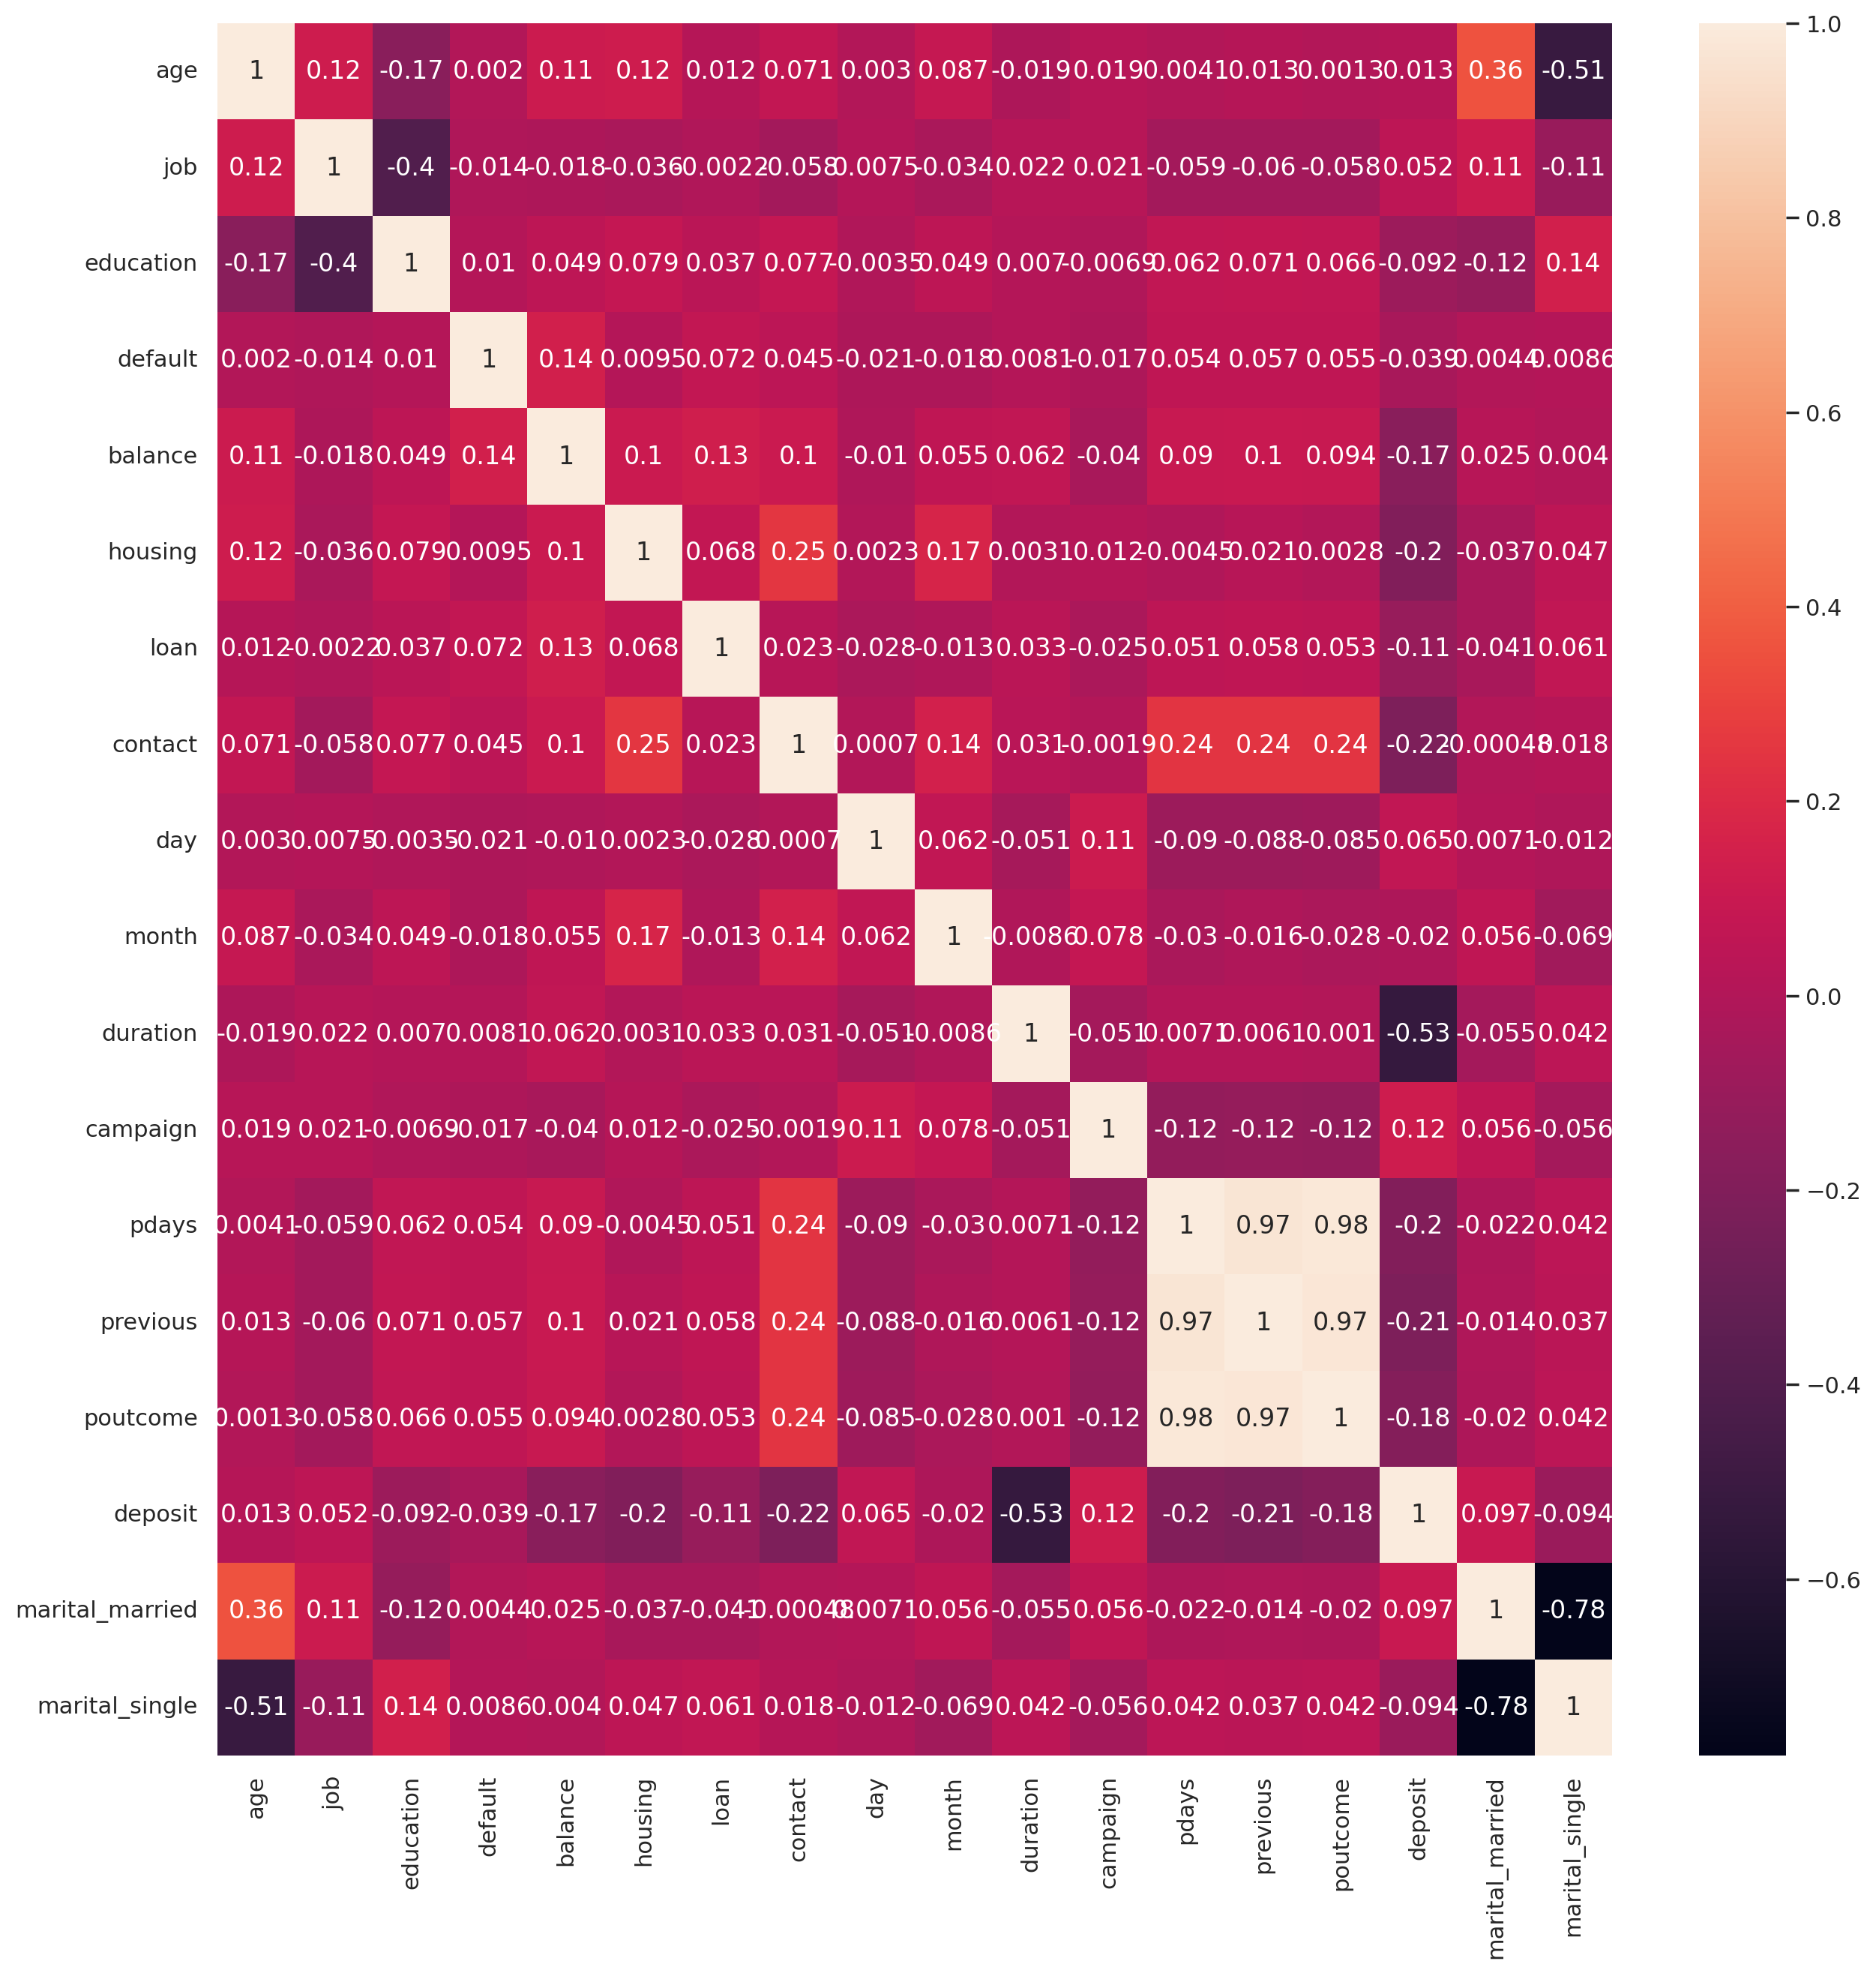

In [ ]:
#check correlation
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(method='spearman'),annot=True,fmt=".2g")

In [ ]:
#=====columns drop=====
drop_col = ["pdays","previous","poutcome","marital_single","deposit", "duration"]
X_train  = X_train.drop(drop_col,axis=1)

## Preprocessing Data Test

In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,balance_category
2454,37,admin.,married,secondary,no,96,no,no,cellular,7,aug,155,1,99,2,success,0-40000
10877,42,technician,single,secondary,no,-321,no,no,cellular,28,jan,230,2,-1,0,unknown,less than 0
815,38,technician,single,secondary,no,3278,no,no,cellular,19,aug,645,14,-1,0,unknown,0-40000
1312,62,management,married,secondary,no,4562,yes,no,cellular,3,mar,168,1,-1,0,unknown,0-40000
6740,23,housemaid,single,primary,no,93,yes,no,cellular,18,may,70,3,-1,0,unknown,0-40000


In [ ]:

#====Ordinal Category=======
map_edu = {'unknown':0,
           'primary':1,
           'secondary':2,
           'tertiary':3}

map_poutcome = {'unknown':0,
                'success':1,
                'failure':2,
                'other':3}

map_job = {'admin.':0,
           'self-employed':1,
           'management':2,
           'entrepreneur':3,
           'unemployed':4,
           'student':5,
           'services':6,
           'technician':7,
           'retired':8,
           'blue-collar':9,
           'housemaid':10,
           'unknown':11}

map_default = {'unknown':0,
           'primary':1,
           'secondary':2,
           'tertiary':3}

map_default = {'yes':0,
               'no':1}
map_housing = {'yes':0,
               'no':1}
map_loan = {'yes':0,
            'no':1}

map_month = {'jan':0,
             'feb':1,
             'mar':2,
             'apr':3,
             'may':4,
             'jun':5,
             'jul':6,
             'aug':7,
             'sep':8,
             'oct':9,
             'nov':10,
             'dec':11}

map_contact = {'unknown':0,
               'cellular':1,
               'telephone':2}

#========Nominal Category======
nom_cat = ["marital"]
X_test = pd.get_dummies(X_test,columns=nom_cat,drop_first=True)

# Mapping untuk mengubah nilai kategori menjadi nilai numerik
X_test["education"] = X_test["education"].map(map_edu)
X_test["poutcome"] = X_test["poutcome"].map(map_poutcome)
X_test["job"] = X_test["job"].map(map_job)
X_test["balance"] = X_test["balance"]
X_test["age"] = X_test["age"]
X_test["day"] = X_test["day"]
X_test['campaign'] = X_test['campaign']
X_test['default'] = X_test['default'].map(map_default)
X_test['housing'] = X_test['housing'].map(map_housing)
X_test['loan'] = X_test['loan'].map(map_loan)
X_test['month'] = X_test['month'].map(map_month)
X_test['pdays'] = X_test['pdays']
X_test['previous'] = X_test['previous']
X_test['contact'] = X_test['contact'].map(map_contact)

In [ ]:
#drop marital status single
X_test = X_test.drop(["marital_single","balance_category", "pdays","previous", "poutcome", "duration"],axis=1)

In [ ]:
missing_check(X_test)

,Missing_values,Percent of Missing (%),Numbers of Unique,Data type
age,0,0.0,70,int64
job,0,0.0,12,int64
education,0,0.0,4,int64
default,0,0.0,2,int64
balance,0,0.0,1463,int64
housing,0,0.0,2,int64
loan,0,0.0,2,int64
contact,0,0.0,3,int64
day,0,0.0,31,int64
month,0,0.0,12,int64


In [ ]:
X_test

,age,job,education,default,balance,housing,loan,contact,day,month,campaign,marital_married
2454,37,0,2,1,96,1,1,1,7,7,1,1
10877,42,7,2,1,-321,1,1,1,28,0,2,0
815,38,7,2,1,3278,1,1,1,19,7,14,0
1312,62,2,2,1,4562,0,1,1,3,2,1,1
6740,23,10,1,1,93,0,1,1,18,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
146,24,9,2,1,685,0,1,0,26,4,3,1
7384,37,4,2,1,459,1,1,1,20,10,4,1
9724,29,7,2,1,328,0,0,1,4,1,1,0
7676,46,9,1,1,-388,0,0,1,10,6,1,1


In [ ]:
X_train

,age,job,education,default,balance,housing,loan,contact,day,month,campaign,marital_married
4050,47,0,2,1,3676,1,1,1,18,9,1,1
4358,35,1,2,1,188,0,0,0,5,5,2,1
9656,31,2,3,1,713,1,1,1,28,7,1,0
221,25,2,1,1,168,0,1,0,3,5,1,1
1344,44,2,3,1,1058,1,1,1,11,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4685,42,2,2,1,283,0,1,1,23,6,1,0
6306,51,2,3,1,0,0,1,1,28,6,4,0
5369,32,6,2,1,250,0,1,0,29,4,1,1
5942,52,2,3,1,11650,0,1,1,17,10,1,1


# Modelling

In [ ]:
models = []
models.append(("Logistic Regression",LogisticRegression(solver="liblinear",random_state=42)))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("SVM",SVC(gamma='auto',)))
models.append(("KNN",KNeighborsClassifier()))
models.append(("Decision Tree Classifier",DecisionTreeClassifier()))
models.append(("Gausian NB",GaussianNB()))

In [ ]:
recall_results = []
precision_results = []
auc_results = []
f1_score = []
names = []
col = ['Algoritm','ROC_AUC_Mean','ROC_AUC_Std',"Recall_Mean","Recall_Std","Precision_Mean","Precision_Std","F1_score_Mean","F1_score_Std"]

df_results = pd.DataFrame(columns=col)

i = 0

c = list(set(X_train.columns))

for name,model in models:
    kfold = model_selection.KFold(n_splits=3)
    cv_recall_results = model_selection.cross_val_score(model,X_train[c],y_train,cv=kfold,scoring="recall")

    cv_precision_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                        cv=kfold,scoring="precision")

    cv_auc_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="roc_auc")

    cv_f1_results = model_selection.cross_val_score(model,X_train[c],y_train,
                                                   cv=kfold,scoring="f1")
    recall_results.append(cv_recall_results)
    precision_results.append(cv_precision_results)
    auc_results.append(cv_auc_results)
    f1_score.append(cv_f1_results)
    names.append(name)

    df_results.loc[i] = [name,
                        round(cv_auc_results.mean()*100,2),
                        round(cv_auc_results.std()*100,2),
                        round(cv_recall_results.mean()*100,2),
                        round(cv_recall_results.std()*100,2),
                        round(cv_precision_results.mean()*100,2),
                        round(cv_precision_results.std()*100,2),
                        round(cv_f1_results.mean()*100,2),
                        round(cv_f1_results.std()*100,2)]
    i += 1
df_results.sort_values("ROC_AUC_Mean",ascending=False)

,Algoritm,ROC_AUC_Mean,ROC_AUC_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,F1_score_Mean,F1_score_Std
1,Random Forest,76.03,0.65,75.28,1.72,70.79,0.68,73.03,1.01
5,Gausian NB,70.17,1.72,53.50,1.91,70.87,1.42,60.97,1.76
0,Logistic Regression,69.38,2.00,66.76,3.46,66.79,1.34,66.75,2.32
4,Decision Tree Classifier,62.29,0.46,64.41,0.69,64.68,0.23,64.23,0.14
3,KNN,58.52,0.75,62.14,1.04,58.18,0.79,60.09,0.75
2,SVM,58.47,0.44,90.94,0.77,53.97,0.30,67.74,0.30


Data di atas merupakan hasil evaluasi kinerja beberapa algoritma klasifikasi menggunakan metrik-metrik tertentu seperti ROC AUC, recall, precision, dan F1-score. Berikut adalah interpretasi dari data tersebut:

Berdasarkan data yang diberikan, kita memiliki hasil evaluasi kinerja beberapa algoritma klasifikasi menggunakan beberapa metrik evaluasi utama. Berikut adalah interpretasi dari data tersebut:

1. **Random Forest**: Algoritma Random Forest memiliki kinerja yang paling tinggi di antara semua algoritma yang dievaluasi. Ini ditunjukkan dengan nilai ROC AUC_Mean sebesar 76, yang menandakan bahwa model ini memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif. Selain itu, F1-score_Mean yang mencapai 72.76 menunjukkan bahwa model ini mencapai keseimbangan yang baik antara recall dan precision.

2. **Gaussian NB**: Algoritma Gaussian NB memiliki kinerja yang cukup baik dengan nilai ROC AUC_Mean sebesar 70.17. Meskipun sedikit di bawah Random Forest, Gaussian NB masih menunjukkan kemampuan yang baik dalam membedakan antara kelas positif dan negatif. Namun, perlu diperhatikan bahwa nilai-nilai lain seperti recall, precision, dan F1-score memiliki variasi yang cukup signifikan (ditunjukkan oleh Standar Deviasi yang lebih tinggi), yang mungkin menunjukkan bahwa model ini tidak konsisten dalam kinerjanya.

3. **Logistic Regression**: Algoritma Logistic Regression memiliki ROC AUC_Mean sebesar 69.34, menempatkannya di antara Gaussian NB dan Decision Tree Classifier dalam hal kinerja. Namun, seperti Gaussian NB, Logistic Regression juga menunjukkan variasi yang cukup signifikan dalam beberapa metrik evaluasi, yang menunjukkan bahwa kinerjanya mungkin tidak konsisten dari lipatan ke lipatan.

4. **Decision Tree Classifier**: Algoritma Decision Tree Classifier memiliki kinerja yang lebih rendah dibandingkan dengan algoritma lainnya, dengan ROC AUC_Mean sebesar 62.36. Ini menunjukkan bahwa model ini memiliki kemampuan yang lebih rendah dalam membedakan antara kelas positif dan negatif. Namun, penting untuk dicatat bahwa tidak hanya ROC AUC_Mean yang penting, tetapi juga metrik lainnya seperti recall, precision, dan F1-score.

5. **KNN dan SVM**: Algoritma KNN dan SVM memiliki kinerja yang lebih rendah dibandingkan dengan algoritma lainnya, dengan ROC AUC_Mean di bawah 60. Ini menunjukkan bahwa kedua model ini mungkin tidak cukup efektif dalam membedakan antara kelas positif dan negatif dalam dataset yang dievaluasi.

Dalam pengambilan keputusan terkait pilihan algoritma klasifikasi, penting untuk mempertimbangkan tidak hanya kinerja rata-rata dari model (seperti ROC AUC_Mean), tetapi juga variasi dalam kinerja (ditunjukkan oleh Standar Deviasi) serta kebutuhan dan karakteristik spesifik dari masalah klasifikasi yang dihadapi.

In [ ]:
df_results.sort_values("F1_score_Mean",ascending=False)

,Algoritm,ROC_AUC_Mean,ROC_AUC_Std,Recall_Mean,Recall_Std,Precision_Mean,Precision_Std,F1_score_Mean,F1_score_Std
1,Random Forest,76.03,0.65,75.28,1.72,70.79,0.68,73.03,1.01
2,SVM,58.47,0.44,90.94,0.77,53.97,0.30,67.74,0.30
0,Logistic Regression,69.38,2.00,66.76,3.46,66.79,1.34,66.75,2.32
4,Decision Tree Classifier,62.29,0.46,64.41,0.69,64.68,0.23,64.23,0.14
5,Gausian NB,70.17,1.72,53.50,1.91,70.87,1.42,60.97,1.76
3,KNN,58.52,0.75,62.14,1.04,58.18,0.79,60.09,0.75


# Evaluation For Data Test

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1058
           1       0.70      0.75      0.72      1175

    accuracy                           0.70      2233
   macro avg       0.70      0.70      0.70      2233
weighted avg       0.70      0.70      0.70      2233



Text(46.25, 0.5, 'Realita')

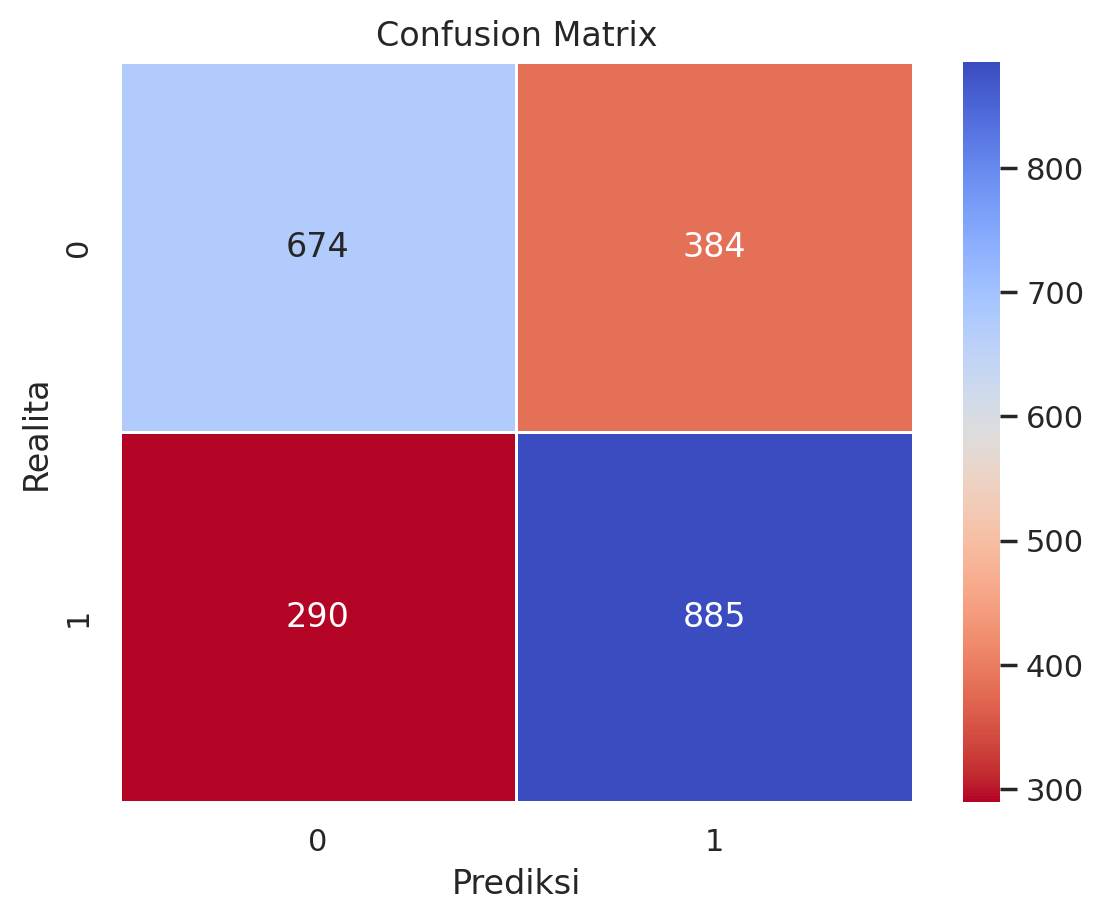

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
print(metrics.classification_report(y_test,rf.predict(X_test)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Realita')

Data diatas adalah hasil evaluasi klasifikasi menggunakan metrik precision, recall, dan f1-score, serta beberapa metrik tambahan seperti support dan akurasi. Berikut adalah interpretasi dari data tersebut:

- **Precision**: Precision mengukur proporsi dari hasil positif yang benar dari semua hasil yang diprediksi positif oleh model. Untuk kelas 0 (nasabah yang deposit), precision adalah 0.70, yang berarti sekitar 70% dari hasil yang diprediksi sebagai kelas 0 (nasabah yang deposit) adalah benar-benar kelas 0 (nasabah yang deposit). Sedangkan untuk kelas 1 (nasabah not deposit), precision adalah 0.70, yang berarti sekitar 70% dari hasil yang diprediksi sebagai kelas 1(nasabah not deposit) adalah benar-benar kelas 1 (nasabah not deposit).

- **Recall**: Recall (juga dikenal sebagai sensitivity) mengukur proporsi dari semua kasus positif yang berhasil diidentifikasi oleh model. Untuk kelas 0, recall adalah 0.64, yang berarti sekitar 64% dari semua kasus kelas 0 berhasil diidentifikasi dengan benar oleh model. Sedangkan untuk kelas 1, recall adalah 0.75, yang berarti sekitar 75% dari semua kasus kelas 1 berhasil diidentifikasi dengan benar oleh model.

- **F1-score**: F1-score adalah rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya. Untuk kelas 0, F1-score adalah 0.67, sedangkan untuk kelas 1, F1-score adalah 0.72.

- **Support**: Support adalah jumlah masing-masing kelas dalam data yang dievaluasi. Dalam kasus ini, terdapat 1058 sampel untuk kelas 0 dan 1175 sampel untuk kelas 1.

- **Accuracy**: Akurasi adalah proporsi dari semua prediksi yang benar yang dilakukan oleh model. Dalam kasus ini, akurasi adalah 0.70, yang berarti sekitar 70% dari semua prediksi yang dilakukan oleh model adalah benar.

Dari data ini, kita dapat menyimpulkan bahwa model memiliki kinerja yang cukup baik secara keseluruhan, dengan precision, recall, dan f1-score yang relatif tinggi untuk kedua kelas. Namun, perlu dicatat bahwa recall untuk kelas 0 sedikit lebih rendah daripada kelas 1, yang mengindikasikan bahwa model mungkin memiliki sedikit lebih banyak kesulitan dalam mengidentifikasi kasus kelas 0. Selain itu, akurasi sebesar 0.70 menunjukkan bahwa model secara keseluruhan mampu membuat prediksi yang cukup baik.

Dari confusion matrix diatas, kita memiliki informasi berikut: <br>

True Positive (TP) adalah 885, yang merupakan jumlah nasabah yang diprediksi memiliki deposito dan memang memiliki deposito.<br>
True Negative (TN) adalah 674, yang merupakan jumlah nasabah yang diprediksi tidak memiliki deposito dan memang tidak memiliki deposito.<br>
False Positive (FP) adalah 384, yang merupakan jumlah nasabah yang diprediksi memiliki deposito, tetapi sebenarnya tidak memiliki deposito.<br>
False Negative (FN) adalah 290, yang merupakan jumlah nasabah yang diprediksi tidak memiliki deposito, tetapi sebenarnya memiliki deposito.<br>

Dari sini, kita dapat melihat keakuratan model dalam memprediksi apakah nasabah melakukan deposito atau tidak. Perlu diperhatikan bahwa False Positive dan False Negative memiliki implikasi yang berbeda-beda tergantung pada konteks aplikasi. Misalnya, dalam kasus pemasaran bank, False Positive (memprediksi nasabah akan melakukan deposito padahal sebenarnya tidak) mungkin akan membuang-buang sumber daya perusahaan, sementara False Negative (memprediksi nasabah tidak akan melakukan deposito padahal sebenarnya akan) dapat menyebabkan kehilangan peluang bisnis. Oleh karena itu, dalam mengevaluasi kinerja model, penting untuk mempertimbangkan metrik lain seperti precision, recall, dan F1-score.

Observasi :<br>
sebanyak 384 diprediksi deposit tapi sebenarnya tidak deposit <br>
sebanyak 290 diprediksi tidak deposit tapi sebenarnya deposit <br>
dengan kata lain,<br>
true positif/berhasil memprediksi deposit = 885 <br>
true negatif/berhasil memprediksi tidak deposit = 674 <br>
false positif/deposit yg tidak berhasil diprediksi = 384 <br>
false negatif/tidak deposit yg tidak berhasil diprediksi = 290 <br>

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,rf.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Random Forest on test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Random Forest on test data: ', round(gini_value*100, 2), '%')

AUC for Random Forest on test data:  75.87 %
Gini for Random Forest on test data:  51.74 %


Data yang diberikan memberikan metrik evaluasi dari model Random Forest pada data uji:

1. **AUC (Area Under the Curve)**: AUC adalah ukuran yang menunjukkan seberapa baik model dapat memisahkan antara dua kelas. Dalam konteks klasifikasi biner, AUC mengukur area di bawah kurva Receiver Operating Characteristic (ROC). Nilai AUC yang diberikan adalah 75.87%. Semakin tinggi nilai AUC, semakin baik model dalam memisahkan antara kelas positif dan negatif. Dalam hal ini, AUC sebesar 75.87% menunjukkan bahwa model Random Forest memiliki kemampuan yang baik dalam membedakan antara kelas positif dan negatif.

2. **Gini**: Gini coefficient adalah metrik lain yang digunakan untuk mengukur ketidaksempurnaan pembagian (impurity) pada pohon keputusan atau model pemisah. Nilai Gini yang diberikan adalah 51.74%. Semakin tinggi nilai Gini, semakin baik model dalam memisahkan antara kelas. Dalam konteks ini, nilai Gini 51.74% menunjukkan bahwa model Random Forest memiliki kemampuan yang cukup baik dalam memisahkan antara kelas.

Secara keseluruhan, interpretasi dari data tersebut adalah bahwa model Random Forest memiliki kinerja yang baik dalam memisahkan antara kelas positif dan negatif pada data uji, dengan nilai AUC dan Gini yang menunjukkan kemampuan pemisahan yang layak.

# Intrepretable

In [ ]:
!pip install dalex

In [ ]:
import dalex as dx

In [ ]:
## initiate explainer for Random Forest model
rf_explainer = dx.Explainer(rf, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8929 rows 12 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8929 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x79bf5fa94790> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.526, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.45, mean = -3.14e-05, max = 0.46
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
rf_explainer.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 12/12 [00:03<00:00,  3.05it/s]


Segmentasi Berdasarkan Usia: Gunakan segmentasi usia (30-50 tahun) sebagai target utama untuk promosi deposito, karena mereka cenderung lebih berpotensi memiliki deposito.

Analisis Lebih Mendalam tentang Saldo dan Pendidikan: Lakukan analisis lebih lanjut untuk memahami hubungan antara saldo nasabah dengan tingkat pendidikan. Ini dapat membantu dalam menentukan apakah ada faktor-faktor lain yang memengaruhi pola ini.

Penargetan Berdasarkan Tingkat Pendidikan: Meskipun tidak ada hubungan langsung antara saldo dan pendidikan, perhatikan bahwa nasabah dengan pendidikan primer memiliki persentase deposito yang tinggi. Gunakan informasi ini untuk menyesuaikan strategi pemasaran dan penawaran produk.

Fokus pada Nasabah dengan Saldo Tinggi: Prioritaskan promosi deposito kepada nasabah dengan saldo di atas 40.000, karena mereka cenderung memiliki deposito tertinggi.

Targetkan Perempuan Single: Karena perempuan single memiliki persentase deposito yang tinggi, jadikan mereka sebagai target utama untuk promosi deposito.

Interaksi yang Intensif untuk Meningkatkan Konversi: Tingkatkan frekuensi interaksi dengan nasabah yang memiliki potensi tinggi untuk membuka deposito, terutama mereka yang telah dihubungi lebih dari 30 kali.

Maksimalkan Periode Sebelum Kontak Terakhir: Manfaatkan periode 15-21 hari sebelum kontak terakhir untuk meningkatkan interaksi dan memperkenalkan penawaran yang menarik kepada nasabah, karena ini dapat mempengaruhi keputusan mereka untuk membuka deposito.

Strategi Pemasaran yang Terfokus: Gunakan informasi tentang segmentasi nasabah berdasarkan saldo dan frekuensi hubungan untuk merancang strategi pemasaran yang lebih terfokus dan efektif.

Dengan menerapkan rekomendasi ini, diharapkan dapat meningkatkan efektivitas kampanye pemasaran dan konversi nasabah menjadi pemilik deposito.



In [ ]:
# visualize permutation feature importance for ridge regression
rf_explainer.model_parts().plot()

# Lift Curve

In [ ]:
!pip install scikit-plot

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

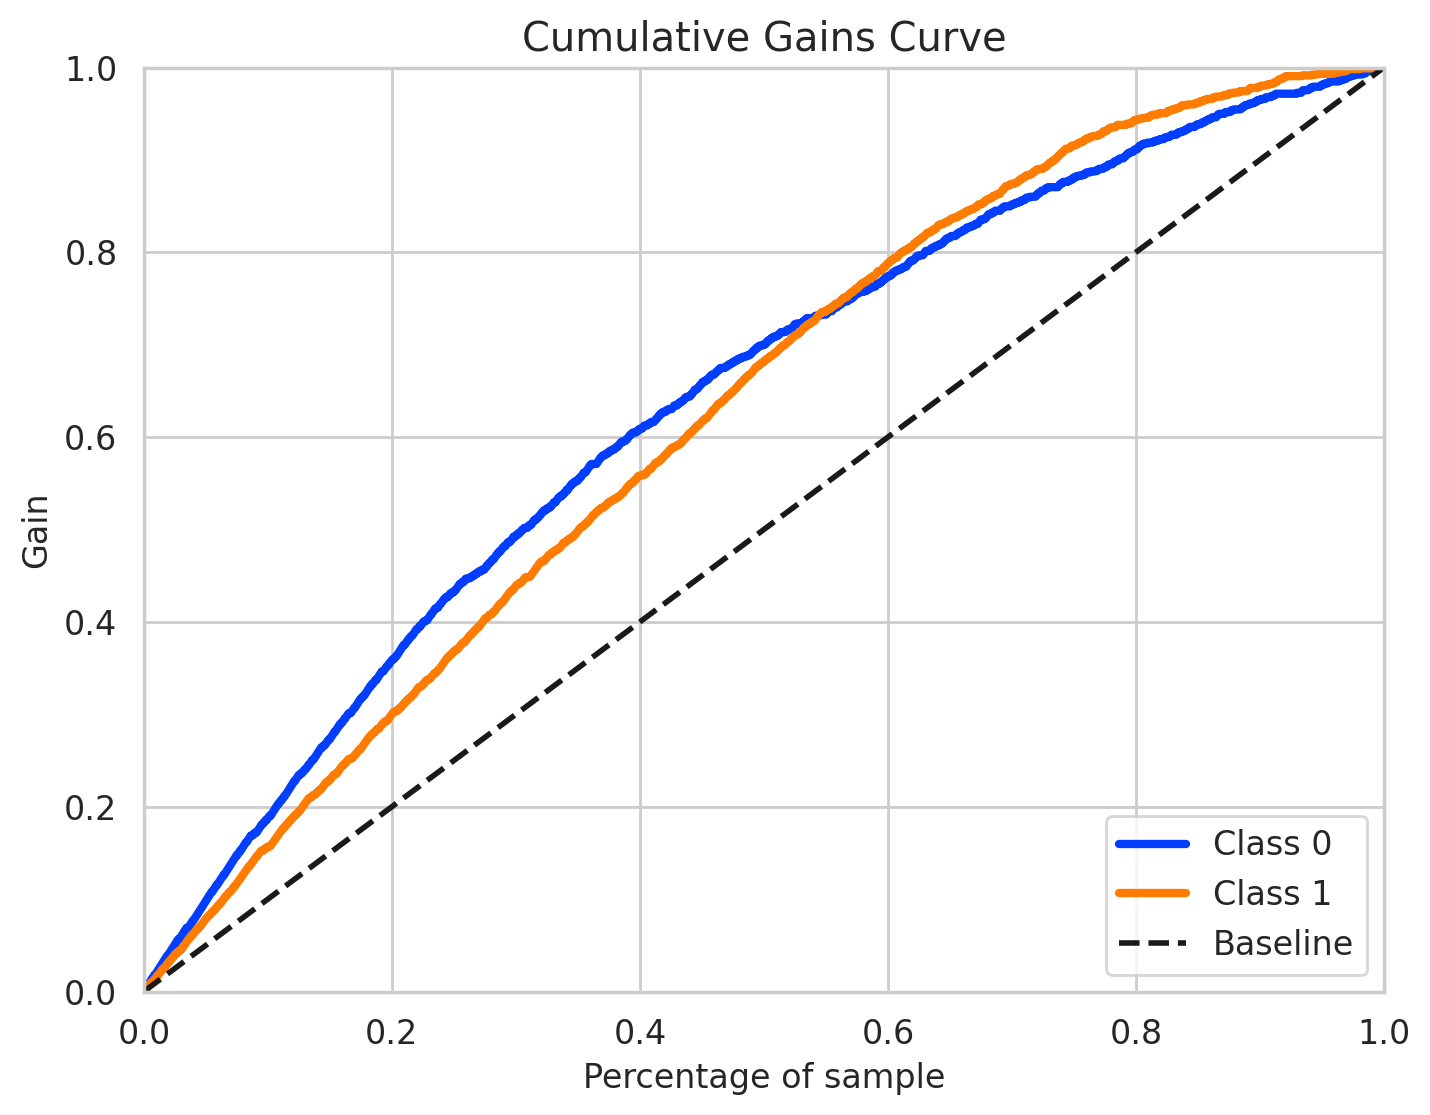

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test,rf.predict_proba(X_test), title='Cumulative Gains Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

Berdasarkan analisis cumulative gains, model menunjukkan kinerja yang baik karena berhasil mengidentifikasi nasabah sebesar 70% yang akan membuka deposito saat memfokuskan pada 20% dari populasi dengan probabilitas tertinggi.

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

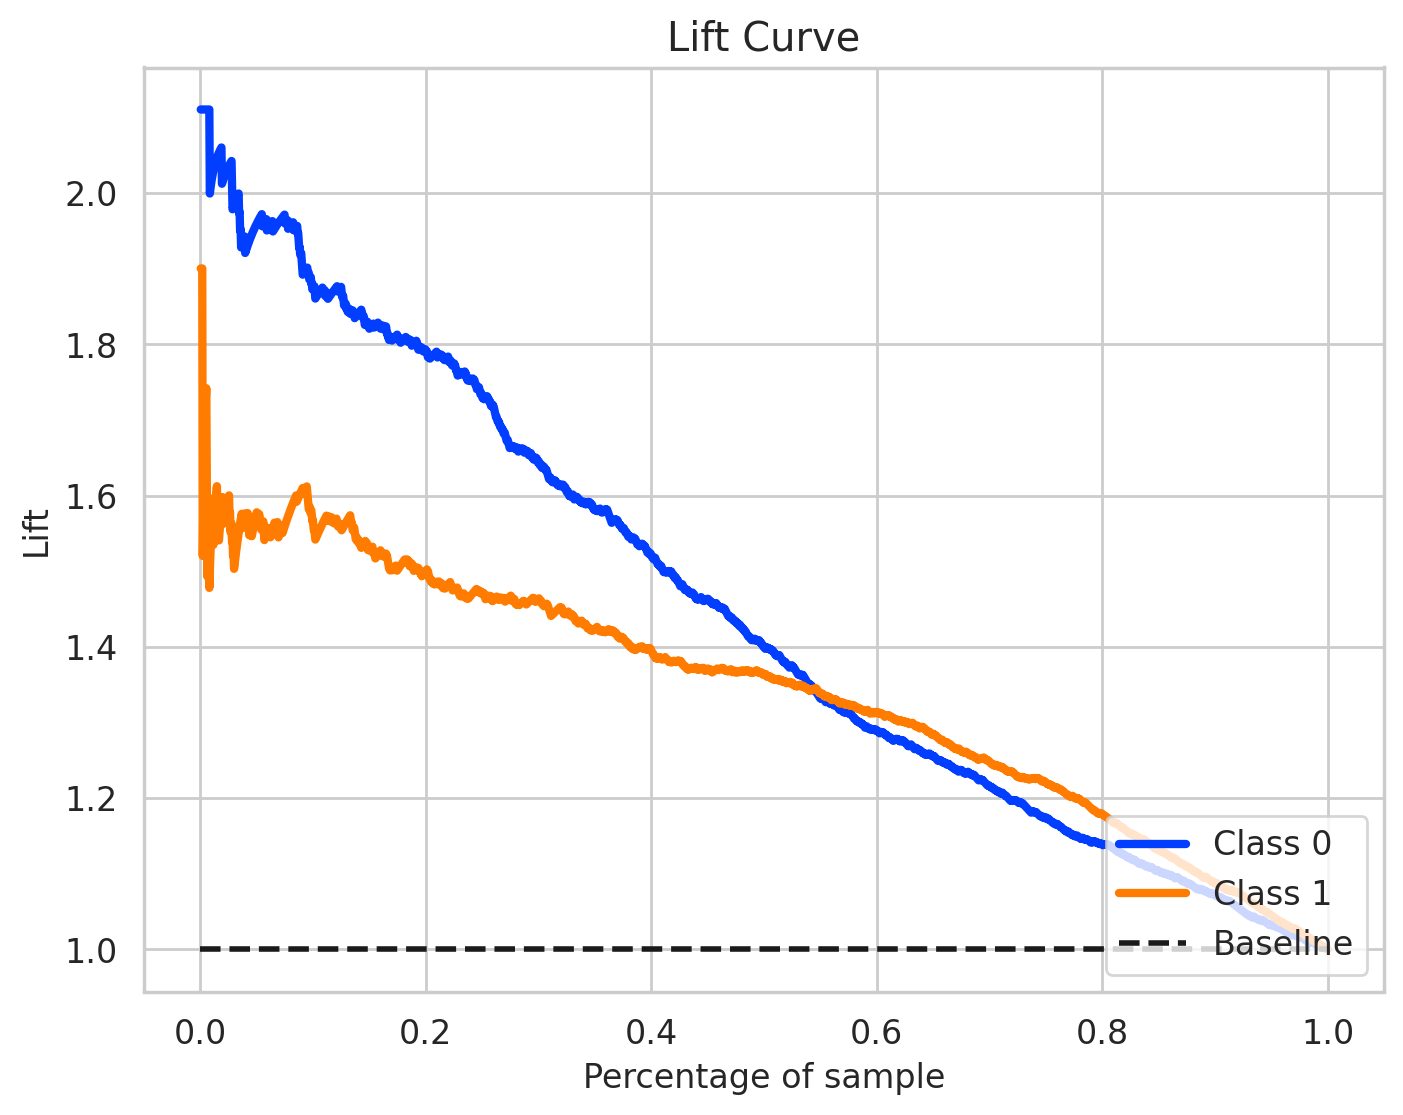

In [ ]:
skplt.metrics.plot_lift_curve(y_test,rf.predict_proba(X_test), title='Lift Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

Dari **grafik lift curve** diatas, dapat ditarik beberapa kesimpulan:

1. **Lift Curve**:
   - Grafik ini menunjukkan **efektivitas model prediksi** dalam membedakan antara nasabah yang akan buka deposito (warna biru) dan nasabah yang tidak buka deposito (warna oranye).
   - **Lift** adalah perbandingan antara akurasi model dengan baseline (random chance). Jika lift > 1, model lebih baik daripada baseline.
   - Pada awal persentase sampel, kurva biru memiliki lift yang jauh lebih tinggi dibandingkan dengan kurva oranye dan baseline.
   - Namun, seiring bertambahnya persentase sampel, kedua kurva mendekati satu sama lain dan baseline, menunjukkan penurunan efektivitas model.

2. **Interpretasi**:
   model memiliki performas 1.4 kali lebih baik dibandingkan random choice pada populasi 20%

Semua ini memberikan wawasan tentang bagaimana model memprediksi peluang nasabah membuka deposito